In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import math
import statistics
import scipy as sp
import random
from scipy.interpolate import interp1d
from scipy import interpolate
from scipy.signal import savgol_filter
from scipy.optimize import minimize, basinhopping, differential_evolution, fmin, curve_fit

In [136]:
# Data Processing
df = pd.read_csv("all_stocks_5yr.csv")

aapl = df[df.Name == "AAPL"]
msft = df[df.Name == "MSFT"]
fb = df[df.Name == "FB"]

print(aapl)
print(msft)
print(fb)

            date      open      high       low     close     volume  Name
1259  2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1260  2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
1261  2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
1262  2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
1263  2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...          ...       ...       ...       ...       ...        ...   ...
2513  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL
2514  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL
2515  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL
2516  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL
2517  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL

[1259 rows x 7 columns]
              date   open    high      low  close    volume  Name
390198  2013-02-08  2

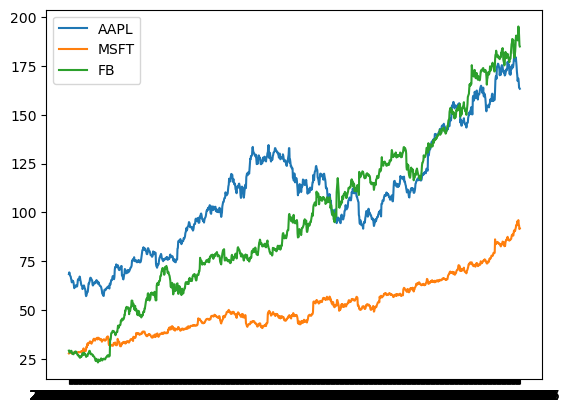

In [138]:
# Graphing
plt.plot(aapl.date, aapl.high, label="AAPL")
plt.plot(msft.date, msft.high, label="MSFT")
plt.plot(fb.date, fb.high, label="FB")

plt.legend()
plt.show()

1259         NaN
1260    0.010368
1261   -0.025386
1262   -0.001905
1263   -0.000900
          ...   
2513    0.002088
2514   -0.044360
2515   -0.025302
2516    0.040942
2517   -0.021640
Name: close, Length: 1259, dtype: float64


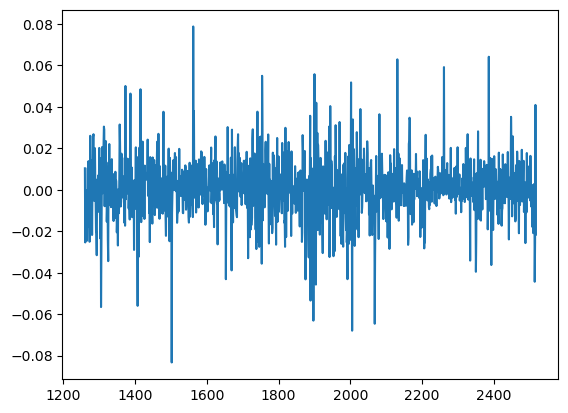

In [151]:
# Correlation Regression Analysis (AAPL vs MSFT)
returns_aapl = np.log(aapl.close / aapl.close.shift(1))

print(returns_aapl)

plt.plot(returns_aapl)

390198         NaN
390199    0.011189
390200    0.000718
390201    0.005366
390202    0.000357
            ...   
391452   -0.007925
391453   -0.026663
391454   -0.042058
391455    0.037143
391456   -0.019012
Name: close, Length: 1259, dtype: float64


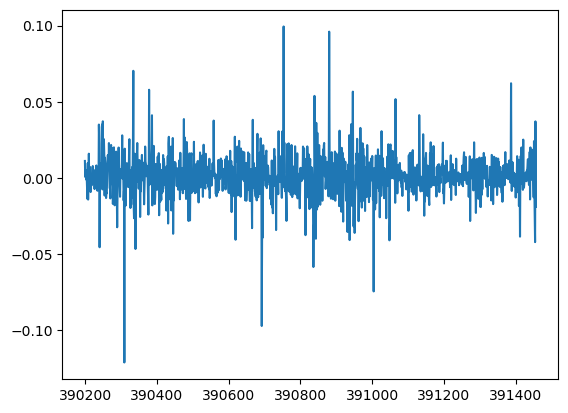

In [150]:
returns_msft = np.log(msft.close / msft.close.shift(1))

print(returns_msft)

plt.plot(returns_msft)

          AAPL      MSFT
0          NaN       NaN
1     0.010368  0.011189
2    -0.025386  0.000718
3    -0.001905  0.005366
4    -0.000900  0.000357
...        ...       ...
1254  0.002088 -0.007925
1255 -0.044360 -0.026663
1256 -0.025302 -0.042058
1257  0.040942  0.037143
1258 -0.021640 -0.019012

[1259 rows x 2 columns]


array([[<AxesSubplot:xlabel='AAPL', ylabel='AAPL'>,
        <AxesSubplot:xlabel='MSFT', ylabel='AAPL'>],
       [<AxesSubplot:xlabel='AAPL', ylabel='MSFT'>,
        <AxesSubplot:xlabel='MSFT', ylabel='MSFT'>]], dtype=object)

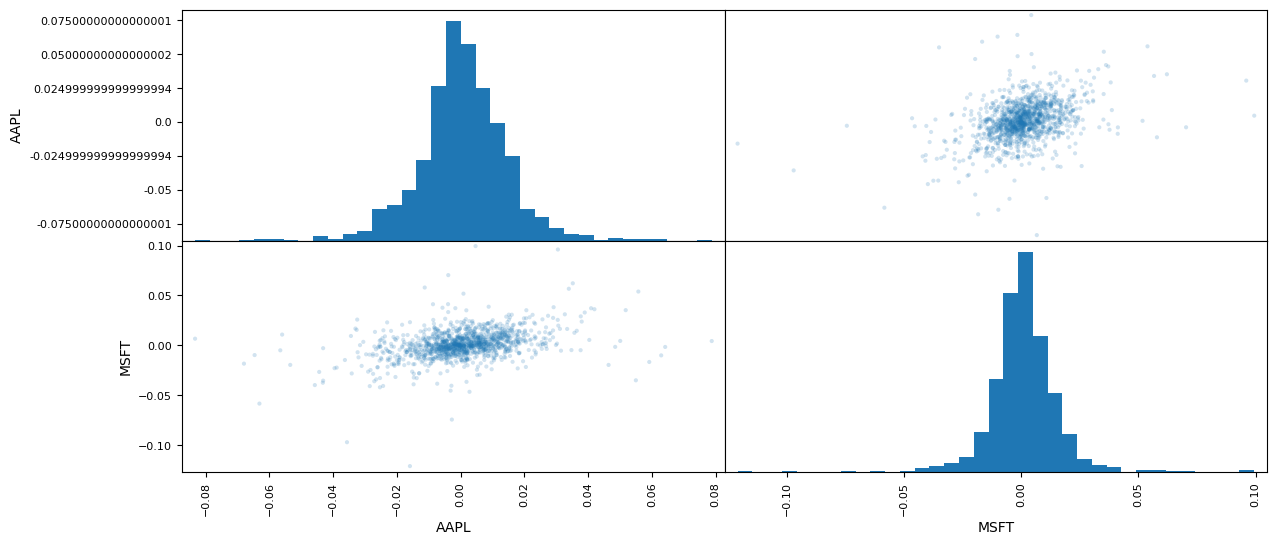

In [159]:
d = {'AAPL': returns_aapl.to_list(),'MSFT': returns_msft.to_list()}
df = pd.DataFrame(d)
print(df)

pd.plotting.scatter_matrix(df, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

In [353]:
df.dropna(inplace=True)
regression = np.polyfit(df['AAPL'], df['MSFT'], deg=2)

plt.scatter(df['AAPL'], df['MSFT'], s=1)
plt.plot(df['AAPL'], np.polyval(regression, df['AAPL']), 'r', lw=2)

print(df.corr())

KeyError: 'AAPL'

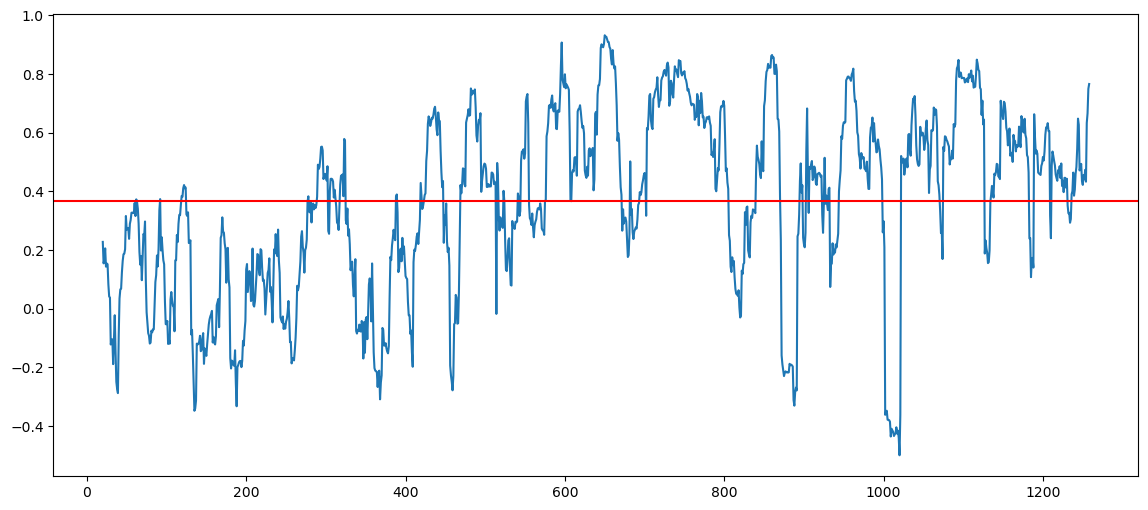

In [173]:
ax = df['AAPL'].rolling(window=20).corr(df['MSFT']).plot(figsize=(14,6))
ax.axhline(df.corr().iloc[0,1], c='r')

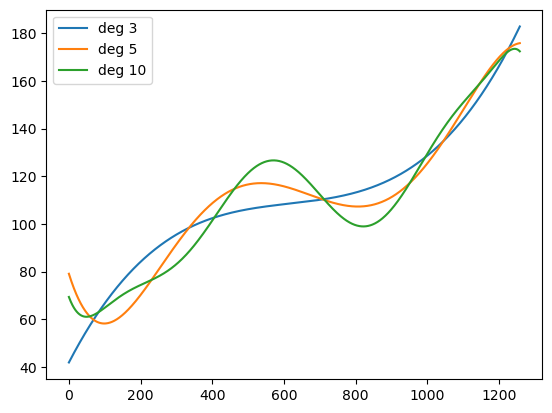

In [52]:
# Polynomial Fitting (AAPL)
x = np.linspace(0,1,len(aapl.date))

aapl_fit = np.polyfit(x, aapl.high, deg=3)
plt.plot(np.polyval(aapl_fit, x), label="deg 3")

aapl_fit = np.polyfit(x, aapl.high, deg=5)
plt.plot(np.polyval(aapl_fit, x), label="deg 5")

aapl_fit = np.polyfit(x, aapl.high, deg=10)
plt.plot(np.polyval(aapl_fit, x), label="deg 10")

plt.legend()

[-3.50366206e+05  1.72639602e+06 -3.53107754e+06  3.86916358e+06
 -2.44748427e+06  9.00244068e+05 -1.86029608e+05  2.01403903e+04
 -8.83336647e+02  7.26567649e+01]
[ 72.65676489  71.96722285  71.30257802 ... 175.47806809 175.61791573
 175.75706002]


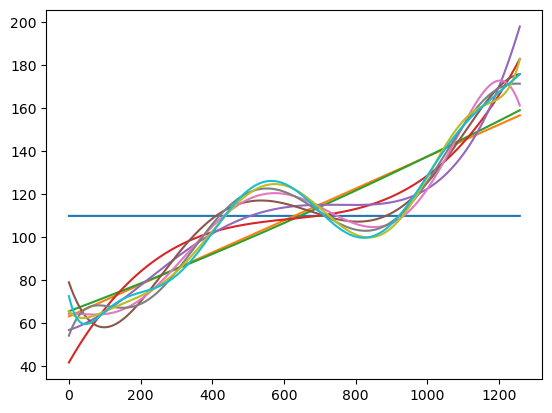

In [53]:
for i in range(10):
    aapl_fit = np.polyfit(x, aapl.high, deg=i)
    plt.plot(np.polyval(aapl_fit, x))

print(aapl_fit)
print(np.polyval(aapl_fit, x))

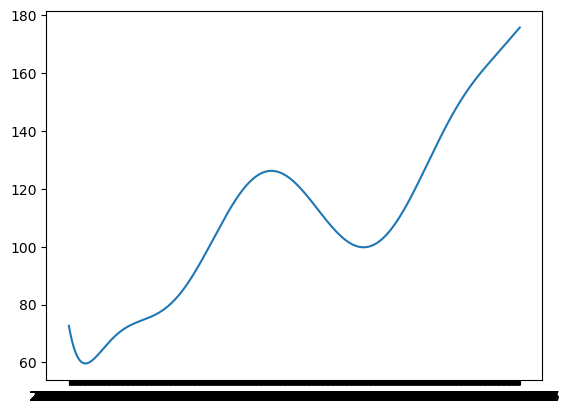

In [54]:
plt.plot(aapl.date, np.polyval(aapl_fit, x))

plt.show()

       1258         1257         1256         1255         1254
74.04 x    + 72.18 x    + 70.52 x    + 69.04 x    + 67.74 x   
          1253         1252         1251         1250         1249
 + 66.59 x    + 65.59 x    + 64.73 x    + 63.98 x    + 63.36 x   
          1248        1247         1246         1245         1244
 + 62.83 x    + 62.4 x    + 62.05 x    + 61.77 x    + 61.57 x   
          1243         1242         1241         1240         1239
 + 61.42 x    + 61.33 x    + 61.29 x    + 61.29 x    + 61.33 x   
          1238         1237         1236         1235         1234
 + 61.39 x    + 61.49 x    + 61.61 x    + 61.74 x    + 61.89 x   
          1233         1232        1231         1230         1229
 + 62.06 x    + 62.23 x    + 62.4 x    + 62.58 x    + 62.76 x   
          1228         1227         1226         1225        1224
 + 62.94 x    + 63.11 x    + 63.28 x    + 63.45 x    + 63.6 x   
          1223         1222         1221         1220         1219
 + 63.75 x    

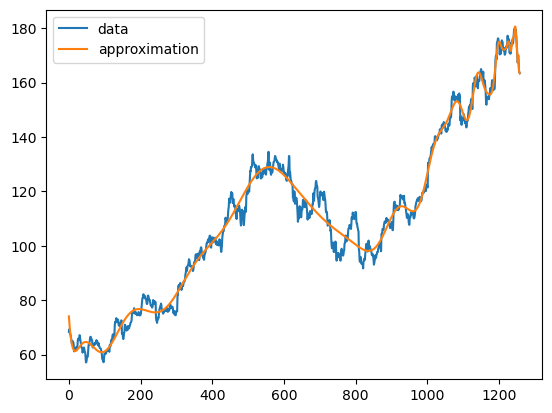

In [141]:
plt.plot(aapl.high.to_list(), label="data")
plt.plot(np.polyval(aapl_fit, x), label="approximation")

f = np.poly1d(np.polyval(aapl_fit, x))
print(f)


plt.legend()

       1258         1257         1256         1255         1254
74.04 x    + 72.18 x    + 70.52 x    + 69.04 x    + 67.74 x   
          1253         1252         1251         1250         1249
 + 66.59 x    + 65.59 x    + 64.73 x    + 63.98 x    + 63.36 x   
          1248        1247         1246         1245         1244
 + 62.83 x    + 62.4 x    + 62.05 x    + 61.77 x    + 61.57 x   
          1243         1242         1241         1240         1239
 + 61.42 x    + 61.33 x    + 61.29 x    + 61.29 x    + 61.33 x   
          1238         1237         1236         1235         1234
 + 61.39 x    + 61.49 x    + 61.61 x    + 61.74 x    + 61.89 x   
          1233         1232        1231         1230         1229
 + 62.06 x    + 62.23 x    + 62.4 x    + 62.58 x    + 62.76 x   
          1228         1227         1226         1225        1224
 + 62.94 x    + 63.11 x    + 63.28 x    + 63.45 x    + 63.6 x   
          1223         1222         1221         1220         1219
 + 63.75 x    

C:\Users\kevin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


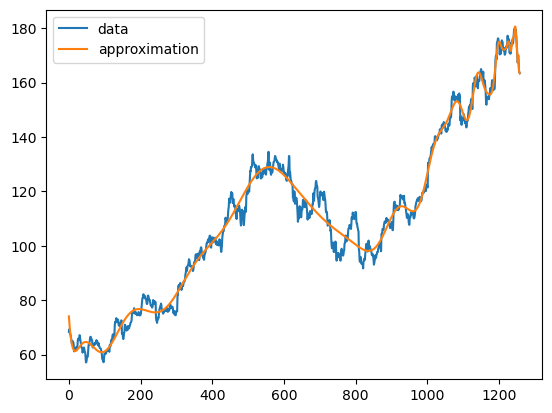

In [140]:
aapl_fit = np.polyfit(x, aapl.high, deg=1000)

plt.plot(aapl.high.to_list(), label="data")
plt.plot(np.polyval(aapl_fit, x), label="approximation")

f = np.poly1d(np.polyval(aapl_fit, x))
print(f)

plt.legend()

2.518e-13


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4340.596800360658


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4340.596800360658


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4737.326133956587


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746


C:\Users\kevin\anaconda3\lib\site-packages\scipy\optimize\_differentiable_functions.py:134: RankWarning: Polyfit may be poorly conditioned
  return fun(np.copy(x), *args)


4046.9452593213746
Optimization terminated successfully.
         Current function value: 4046.945259
         Iterations: 1
         Function evaluations: 33
         Gradient evaluations: 11
[ 3.00000000e+01 -5.12551164e-05]


C:\Users\kevin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\kevin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


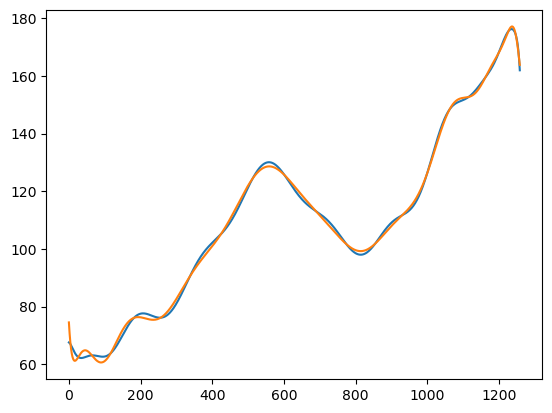

In [134]:
# Introduction to data optimization
def optimizeData(v, data):
    aapl_fit = np.polyfit(x, aapl.high, deg=v[0], rcond=v[1])
    diff = 0
    for i in range(len(data)):
        diff += abs(data[i] - np.polyval(aapl_fit, x)[i])
    print(diff)
    return diff

print(len(x)*2e-16)
# Nfeval = 1
# def callbackF(Xi):
#     global Nfeval
#     print(str(Nfeval) + ": " + str(optimizeDose(Xi, aapl.high.to_list())))
#     Nfeval += 1

result = minimize(optimizeData, [10, len(x)*2e-16], args=(aapl.high.to_list(),), options={"maxiter": 10, "disp": True})
print(result.x)

aapl_fit = np.polyfit(x, aapl.high, deg=result.x[0], rcond=result.x[1])
plt.plot(np.polyval(aapl_fit, x), label="optimized result")
aapl_fit = np.polyfit(x, aapl.high, deg=30)
plt.plot(np.polyval(aapl_fit, x), label="default")

In [343]:
# Applications of Optimization
df = pd.read_csv("transactions.csv")
print(df)

             date  store_nbr  transactions
0      2013-01-01         25           770
1      2013-01-02          1          2111
2      2013-01-02          2          2358
3      2013-01-02          3          3487
4      2013-01-02          4          1922
...           ...        ...           ...
83483  2017-08-15         50          2804
83484  2017-08-15         51          1573
83485  2017-08-15         52          2255
83486  2017-08-15         53           932
83487  2017-08-15         54           802

[83488 rows x 3 columns]


[[2111, 1833, 1863, 1509, 520, 1807, 1869, 1910, 1679, 1813, 1473, 542, 1780, 1680, 1933, 1786, 1745, 1389, 507, 1770, 1762, 1873, 1616, 1770, 1295, 542, 1738, 1772, 1877, 1707, 1806, 1377, 531, 1714, 1775, 1853, 1727, 1878, 1104, 374, 396, 487, 1921, 2119, 1787, 1263, 399, 1742, 1806, 1835, 1756, 1805, 1448, 512, 1760, 1804, 1845, 1763, 1916, 1332, 547, 1841, 1750, 1929, 1751, 1960, 1337, 538, 1874, 1734, 1841, 1751, 1812, 1238, 561, 1696, 1728, 1879, 1727, 1689, 1358, 531, 1770, 1700, 1840, 1729, 474, 1002, 464, 1894, 1705, 1912, 1723, 1899, 1349, 521, 1824, 1744, 1916, 1638, 1860, 1338, 525, 1804, 1757, 1807, 1607, 1737, 1335, 505, 1838, 1697, 1921, 1660, 1843, 1314, 517, 1653, 1897, 613, 1763, 1847, 1347, 538, 1834, 1792, 1904, 1813, 1959, 1488, 549, 1784, 1747, 1887, 1781, 1883, 1299, 497, 1732, 1692, 1865, 1753, 496, 1107, 411, 1748, 1787, 1815, 1737, 1818, 1357, 430, 1882, 1785, 1845, 1815, 1885, 1279, 510, 1826, 1855, 1863, 1711, 1856, 1356, 541, 1786, 1775, 1783, 1629, 1700, 1

465152502.5
465152502.5
465152502.61409783
465152503.3315139
465152505.6971656
465152506.0381595
465152506.2590689
465152506.94280535
465152508.12617654
465152508.2299136
465152509.43131244
-6693336105979180.0
-1.1576066699708025e+30
-1.9127748528884026e+42
-3.230819741169216e+52
-5.518262573470089e+60
-9.442876134597834e+66
-1.576502169062608e+71


C:\Users\kevin\AppData\Local\Temp\ipykernel_63500\2342929545.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


-1.9647743551001824e+73
4.306392303213929e+73
2.86391439943841e+73
2.7959003893872186e+73
2.7844826860861755e+73
2.7788391962030764e+73
2.773239145718183e+73
2.7676823747420752e+73
2.762168803205578e+73
2.7566983220338337e+73
2.7512708230861232e+73
2.7458861992927526e+73
2.7405443416483832e+73
-5.58107823205661e+151
nan


C:\Users\kevin\AppData\Local\Temp\ipykernel_63500\2342929545.py:43: RuntimeWarning: overflow encountered in double_scalars
  cost += sum(data[i])*costs[i]
C:\Users\kevin\AppData\Local\Temp\ipykernel_63500\2342929545.py:43: RuntimeWarning: invalid value encountered in double_scalars
  cost += sum(data[i])*costs[i]
C:\Users\kevin\AppData\Local\Temp\ipykernel_63500\2342929545.py:52: RuntimeWarning: overflow encountered in double_scalars
  data[i] = [z * a[i] for z in data[i]]


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
inf
nan
inf
nan
inf
nan
inf
nan


C:\Users\kevin\AppData\Local\Temp\ipykernel_63500\2342929545.py:54: RuntimeWarning: invalid value encountered in double_scalars
  new_curve = [sum(z) for z in zip(*data)]


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Iteration limit reached    (Exit mode 9)
            Current function value: nan
            Iterations: 10
            Function evaluations: 197
            Gradient evaluations: 10
[nan nan nan nan nan nan nan nan nan]


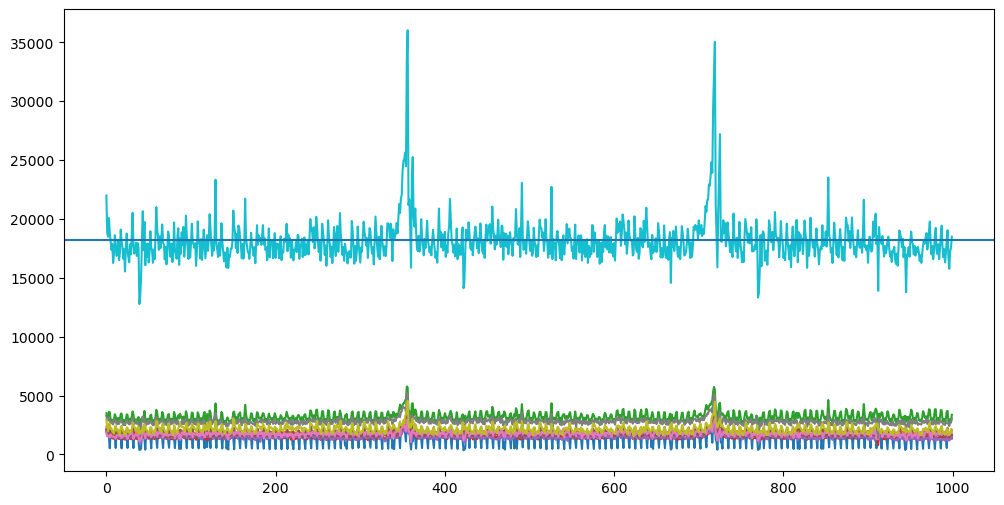

<Figure size 640x480 with 0 Axes>

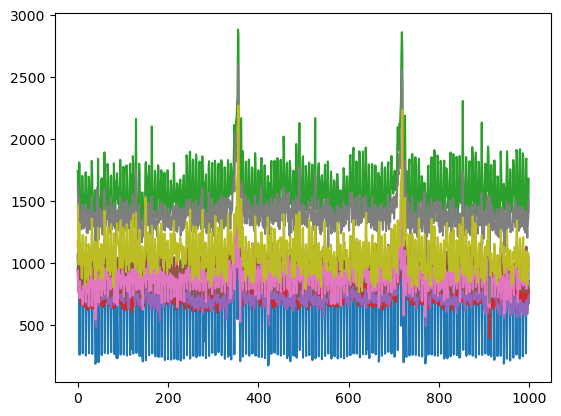

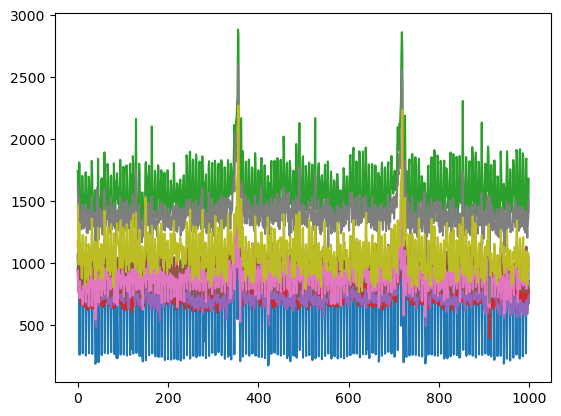

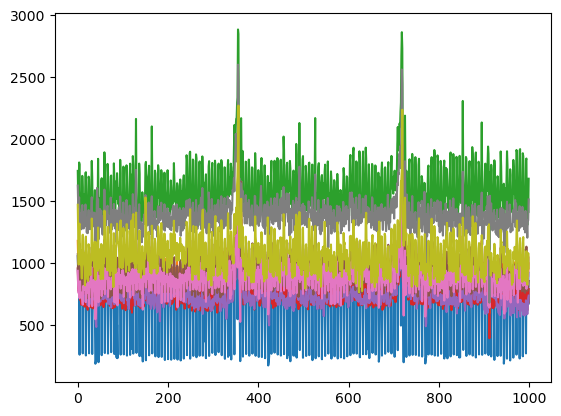

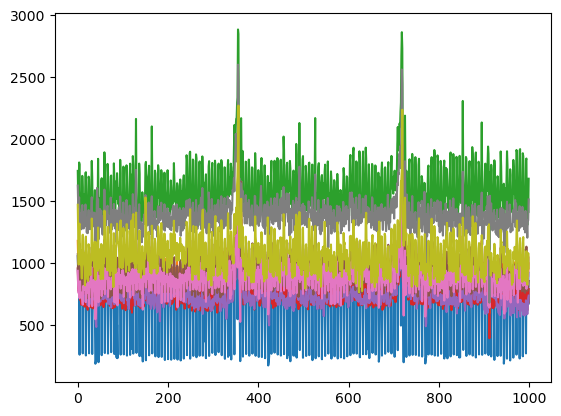

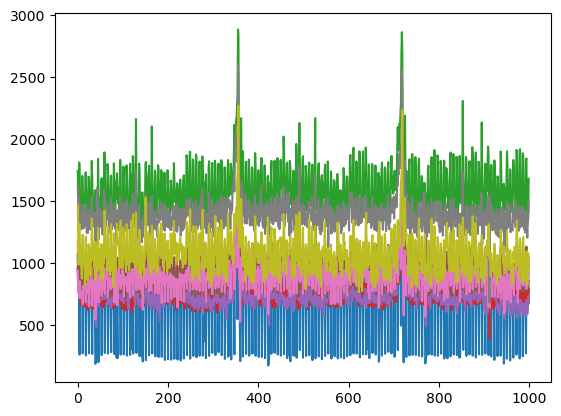

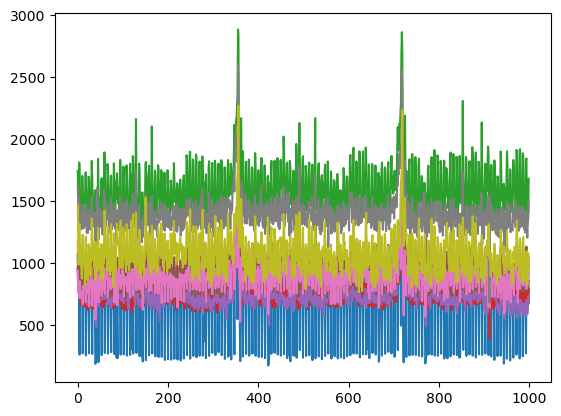

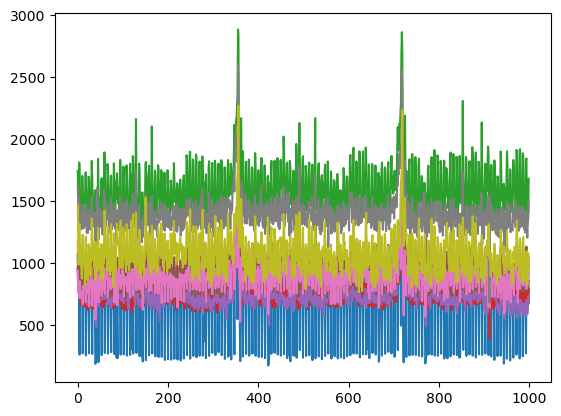

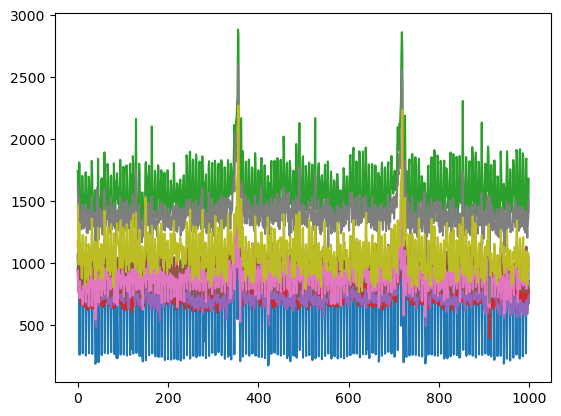

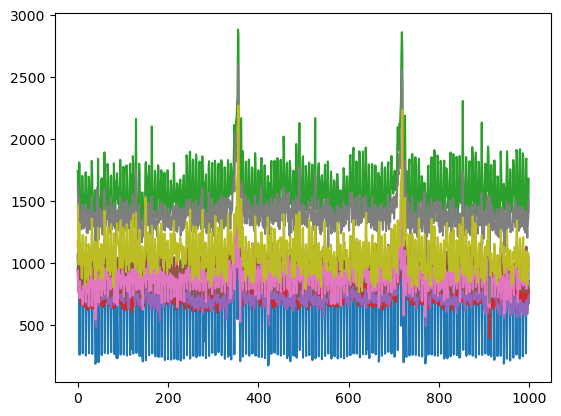

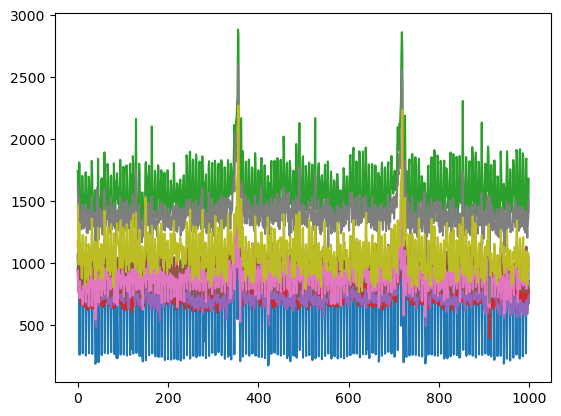

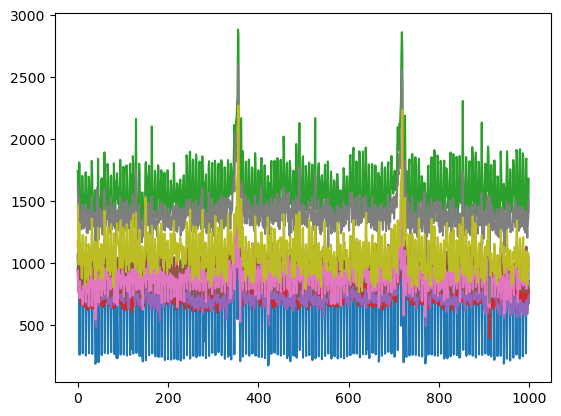

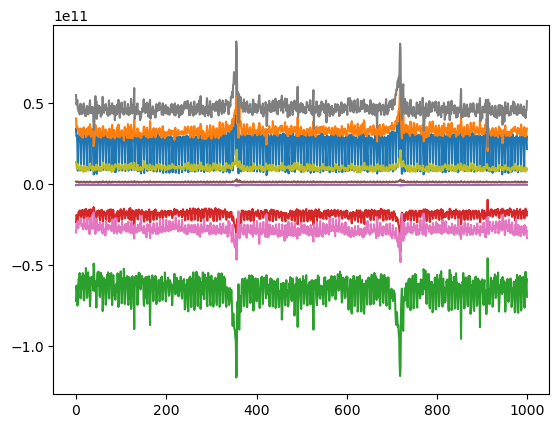

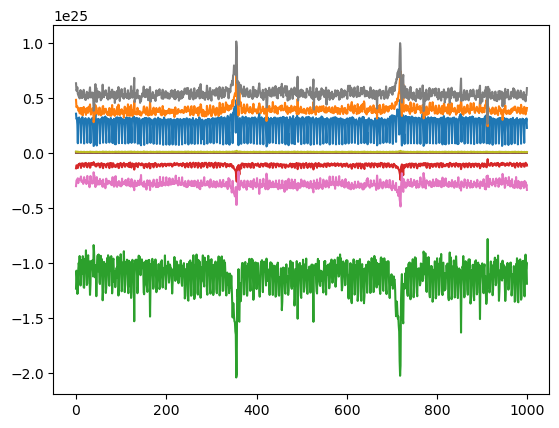

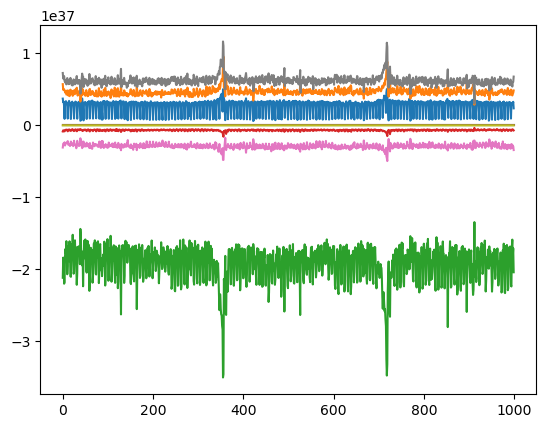

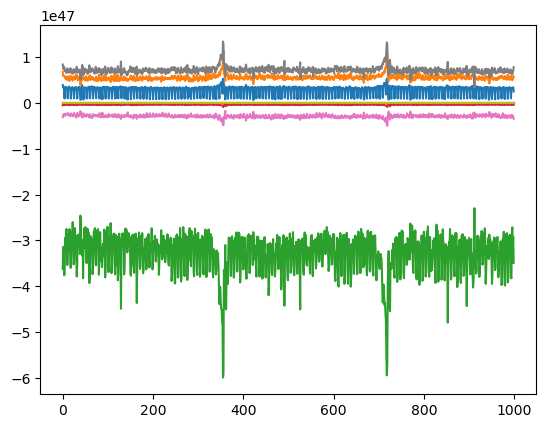

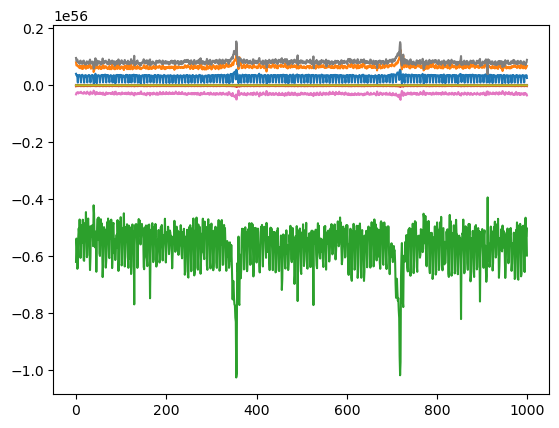

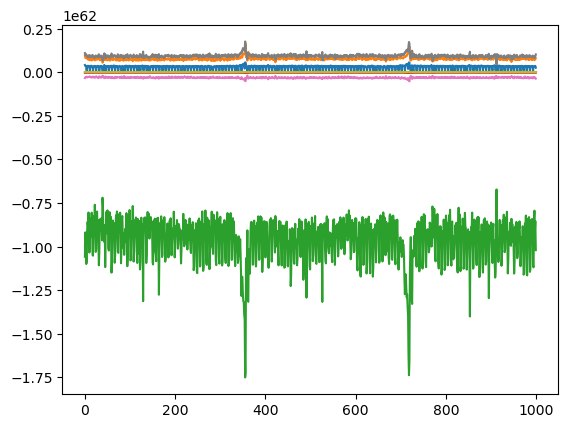

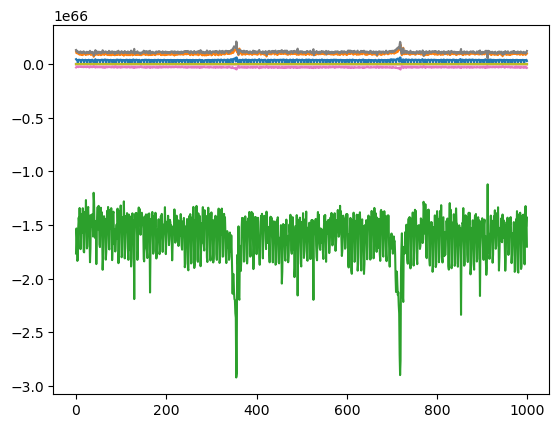

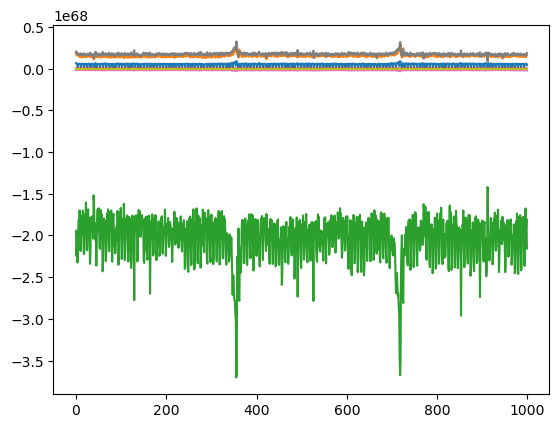

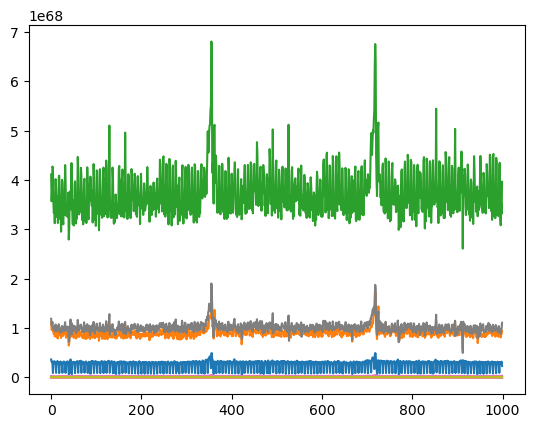

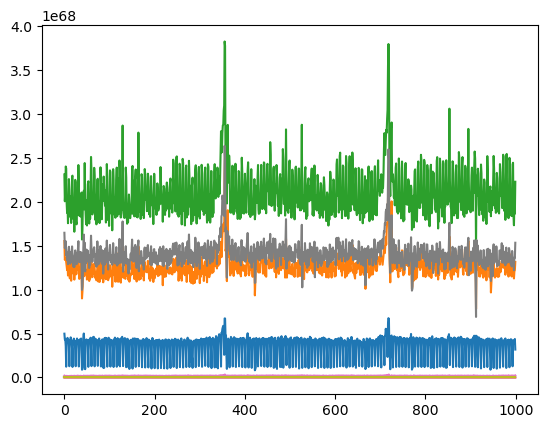

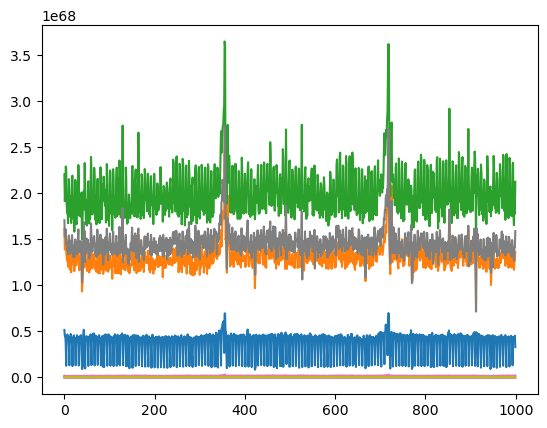

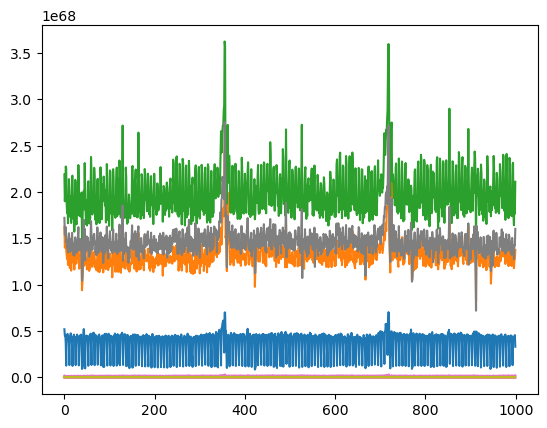

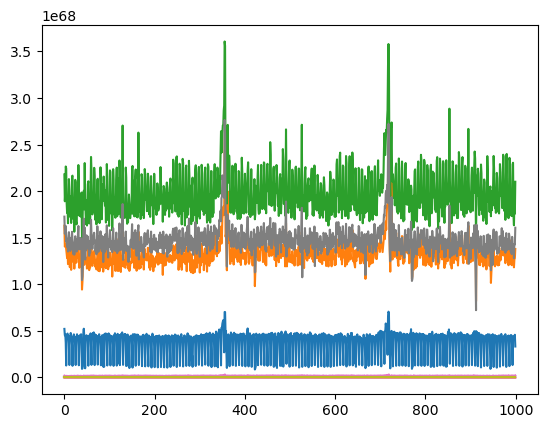

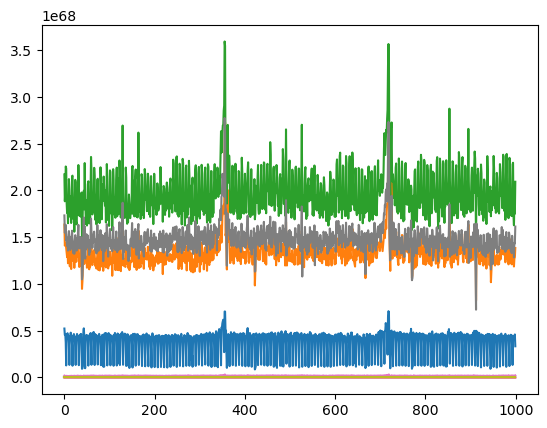

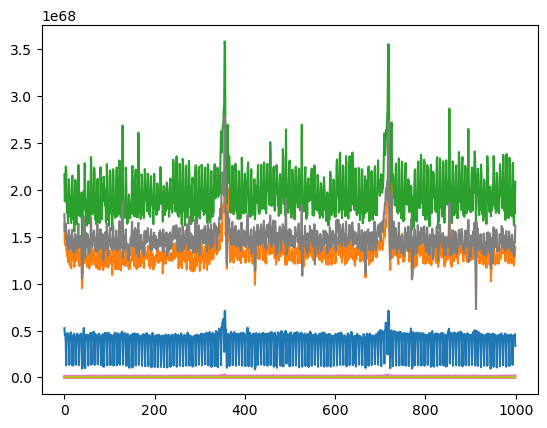

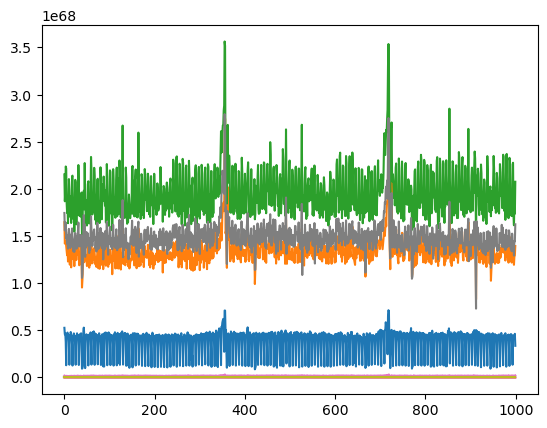

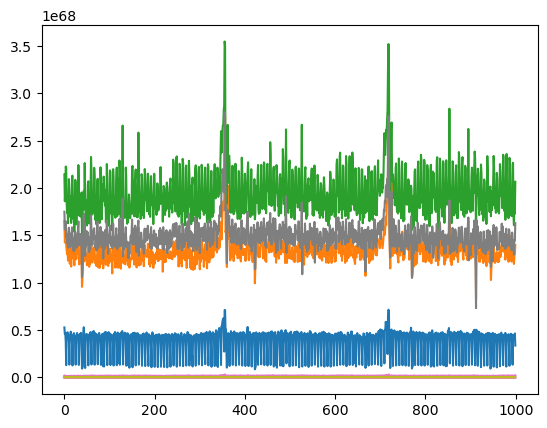

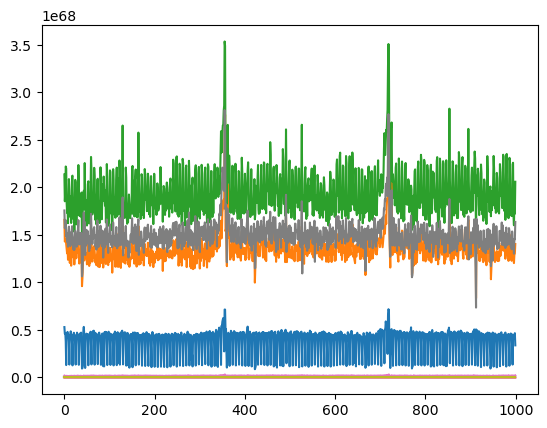

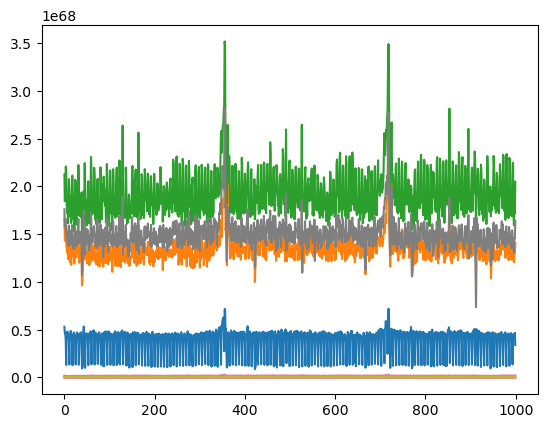

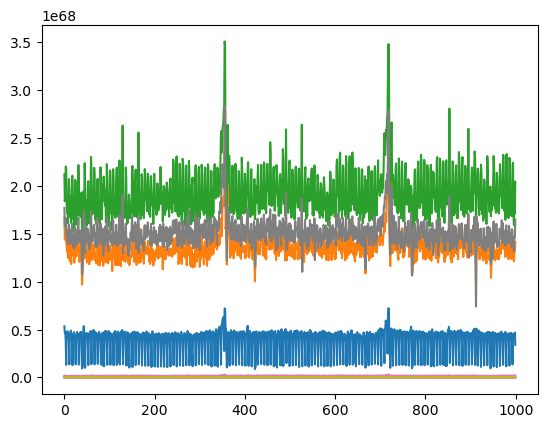

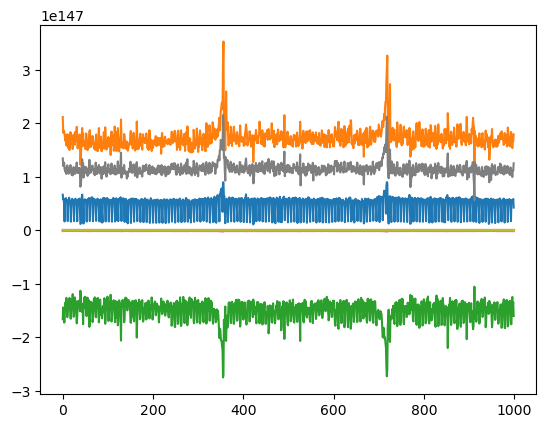

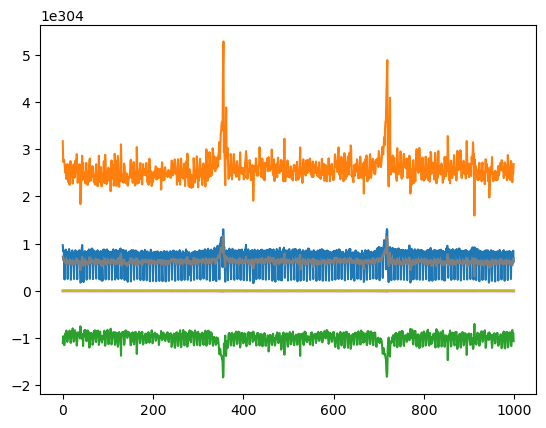

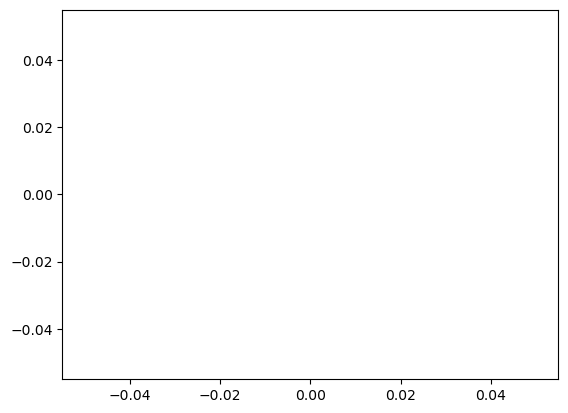

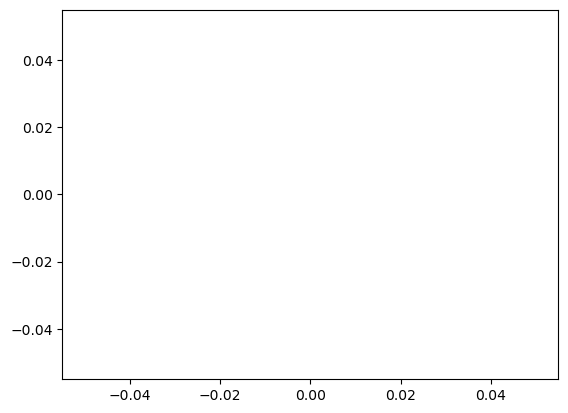

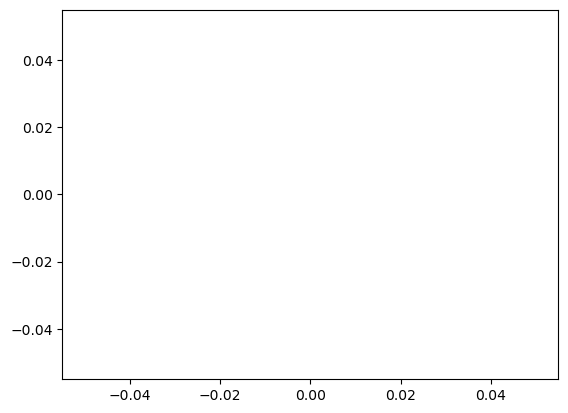

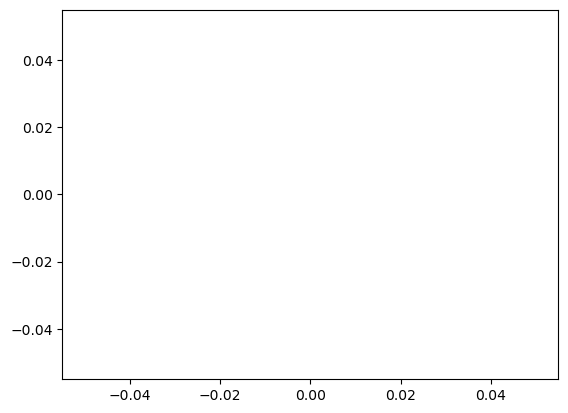

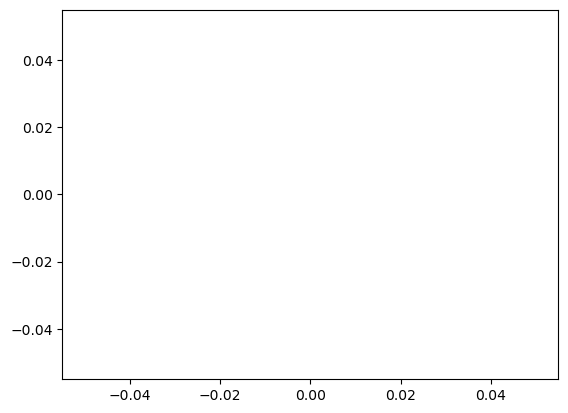

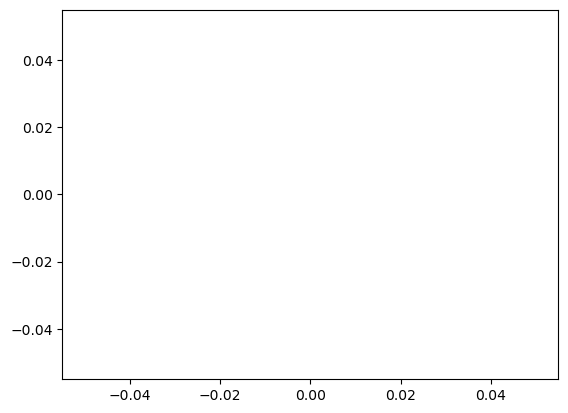

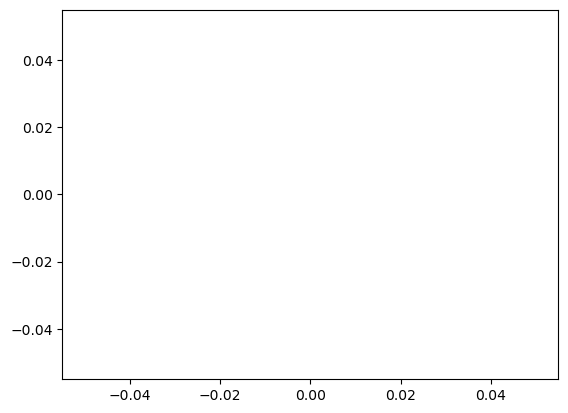

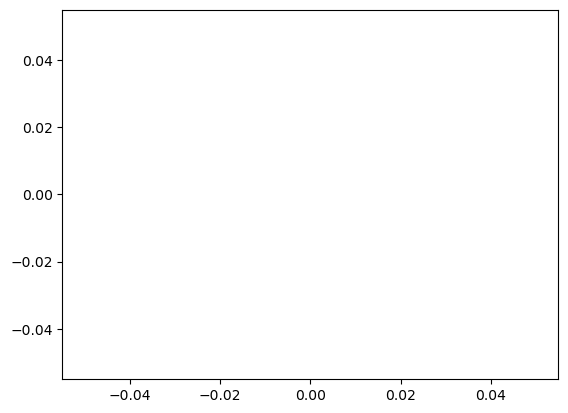

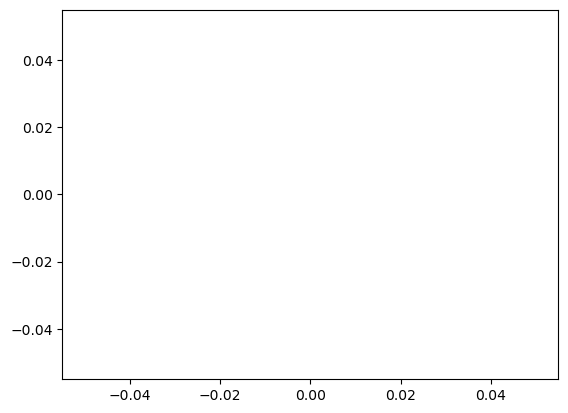

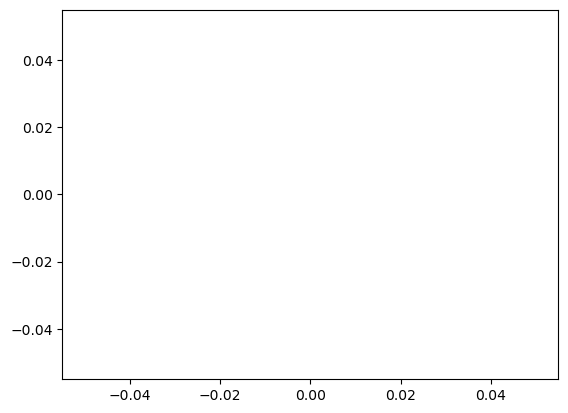

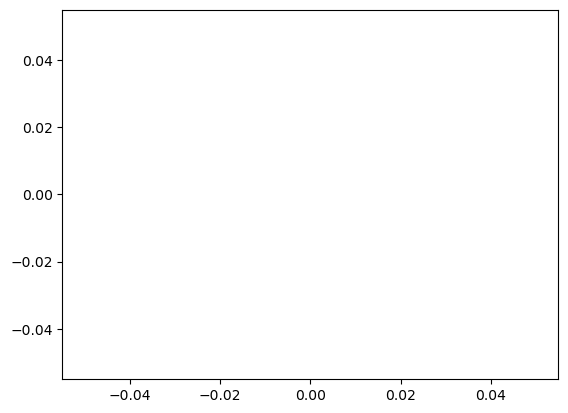

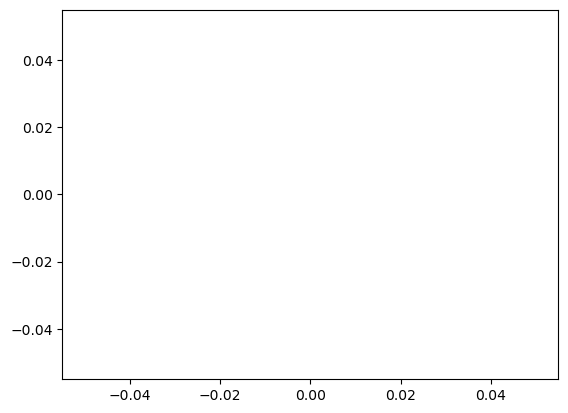

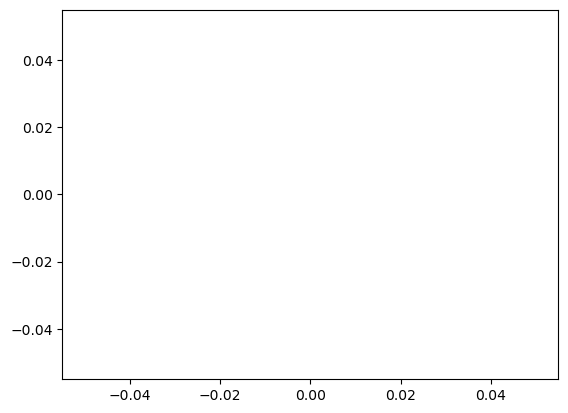

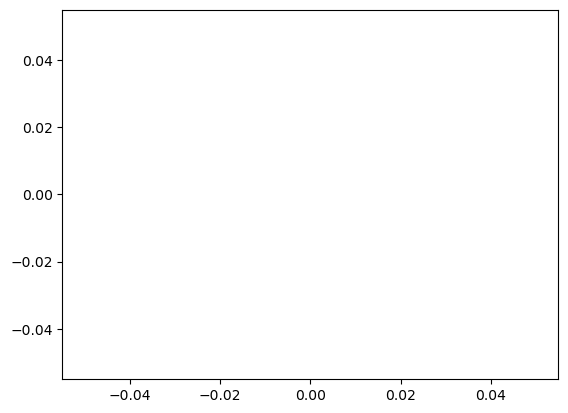

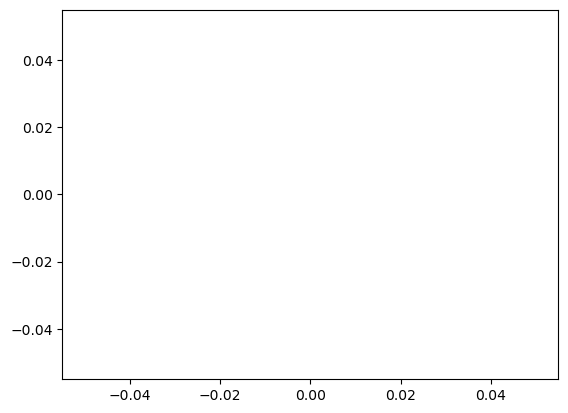

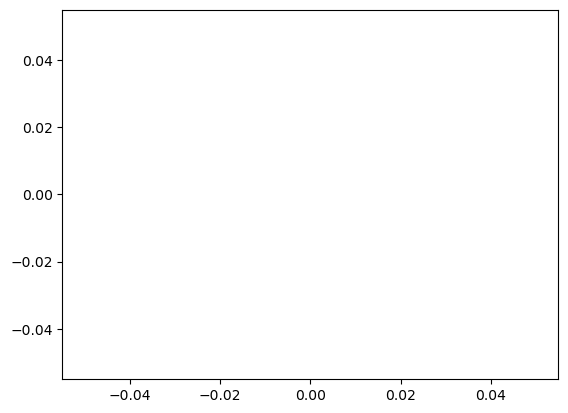

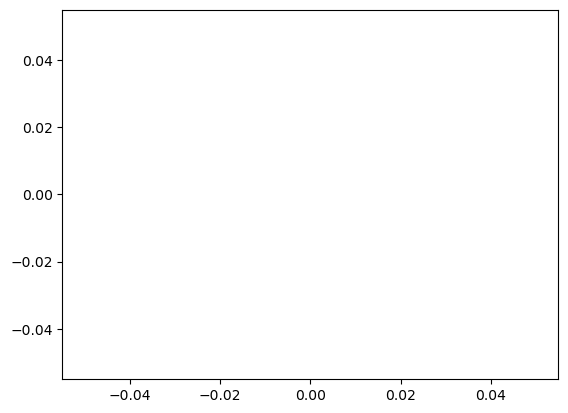

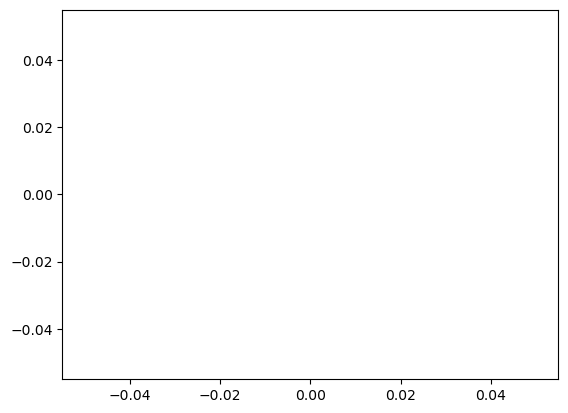

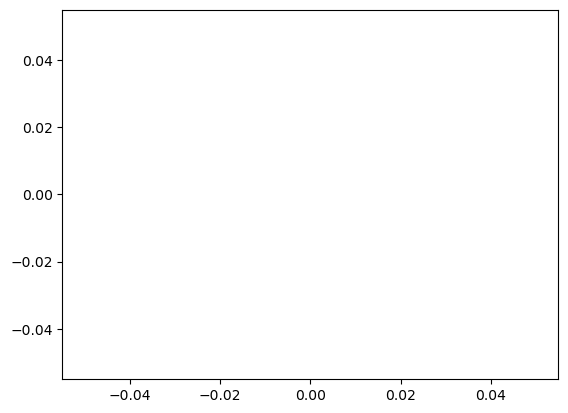

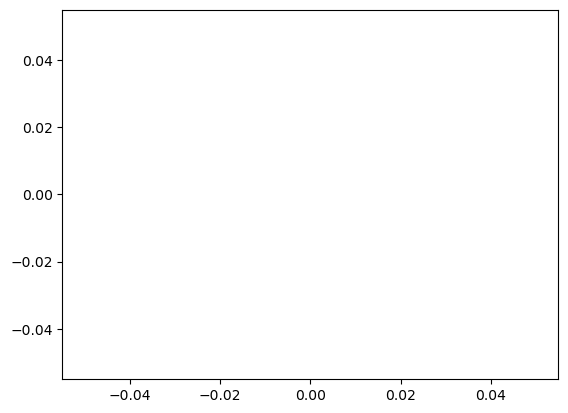

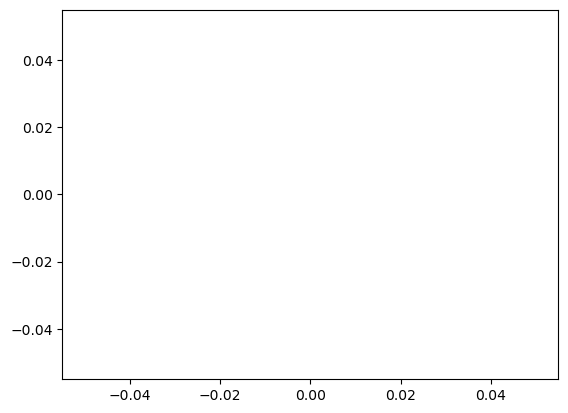

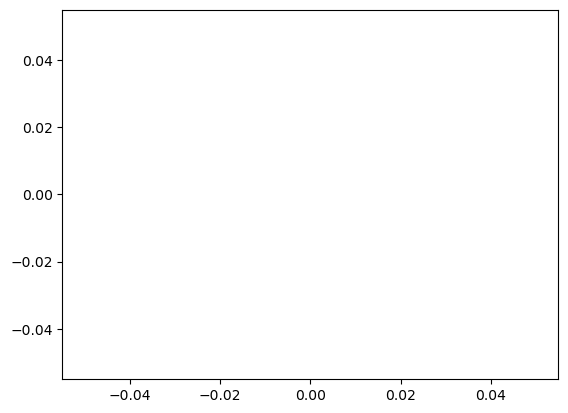

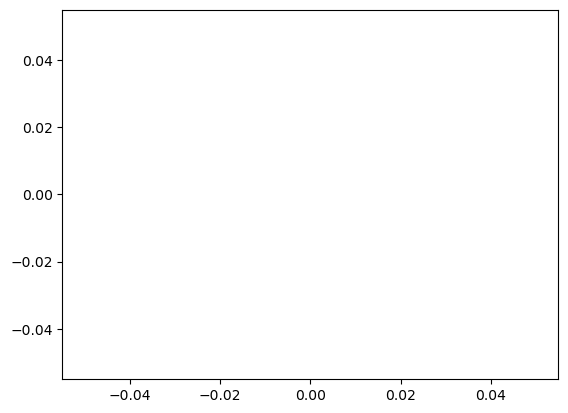

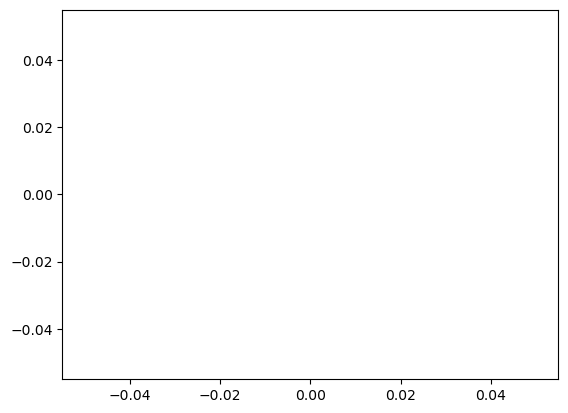

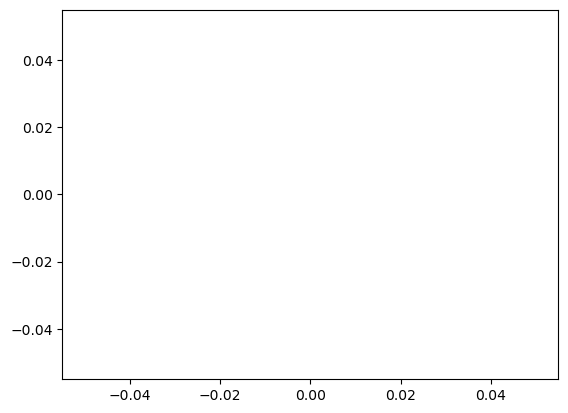

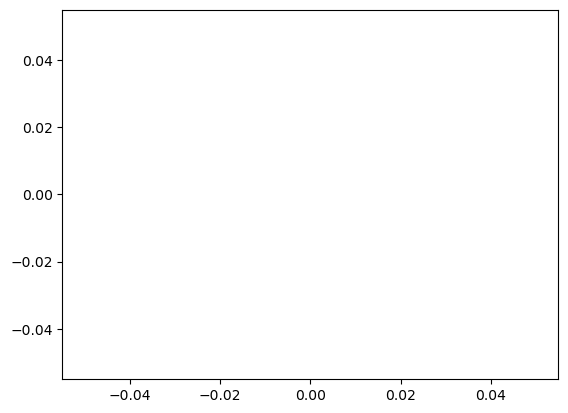

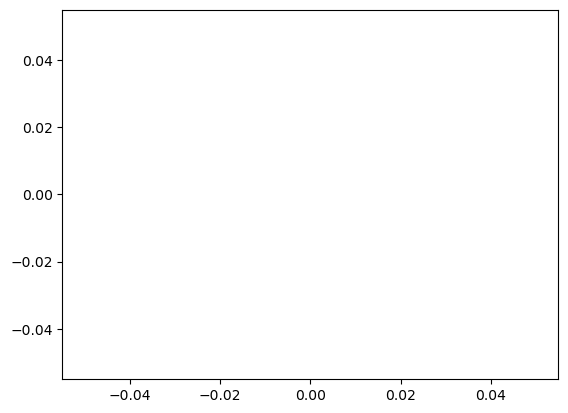

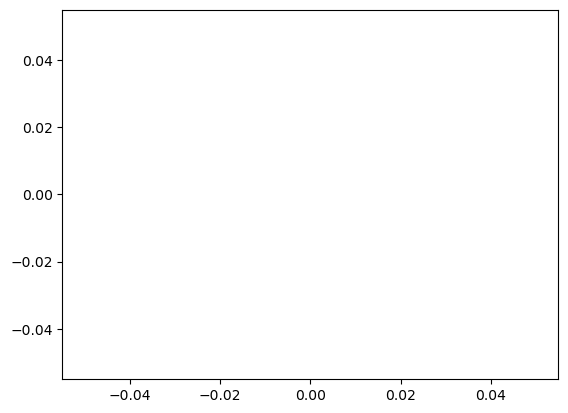

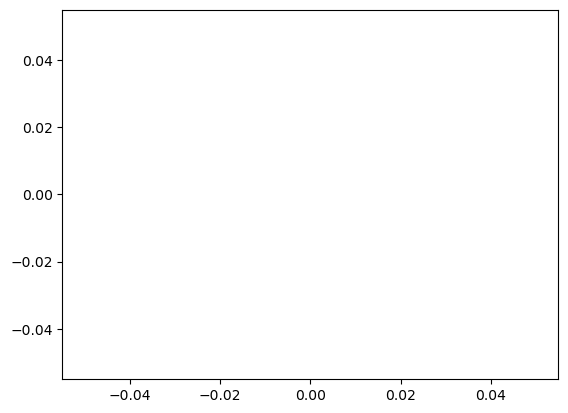

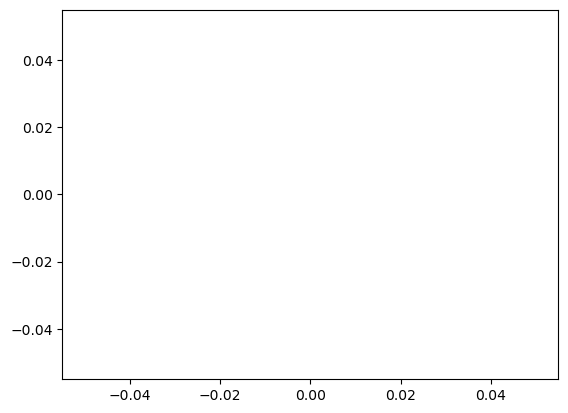

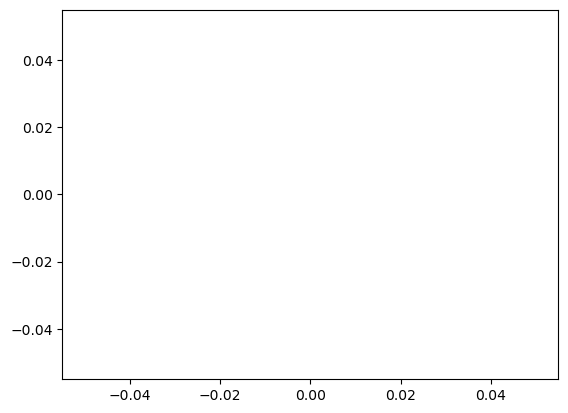

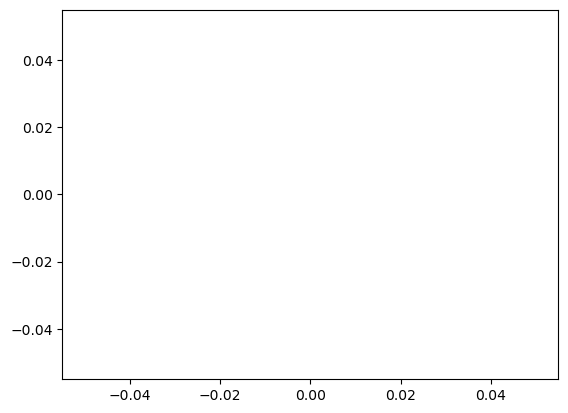

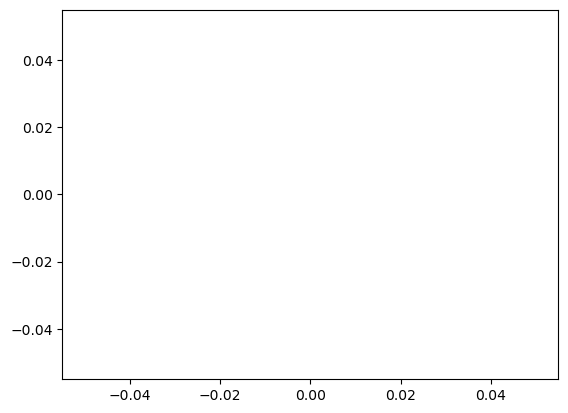

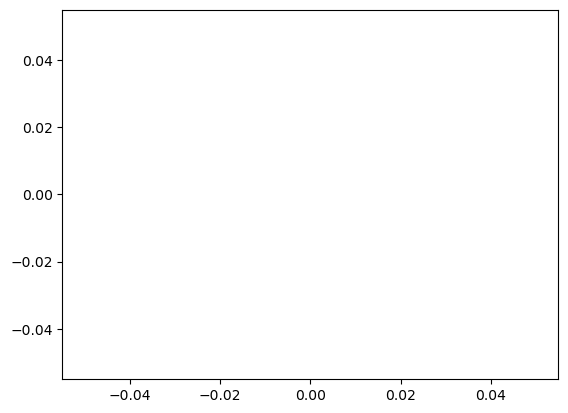

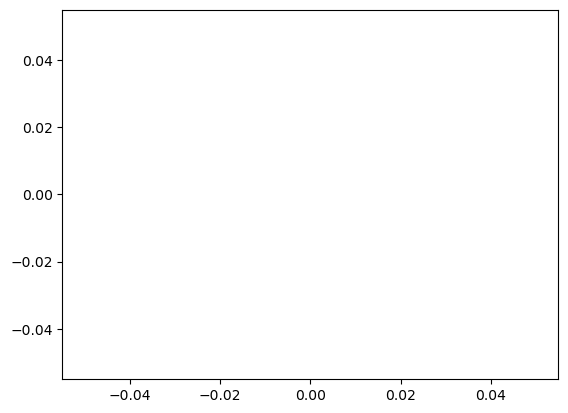

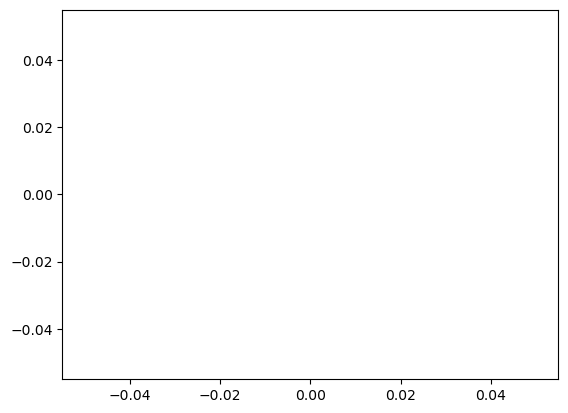

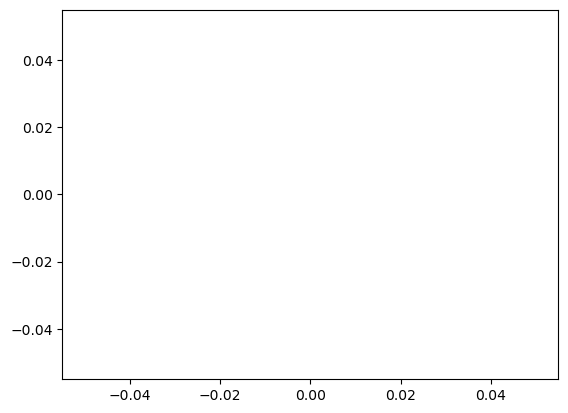

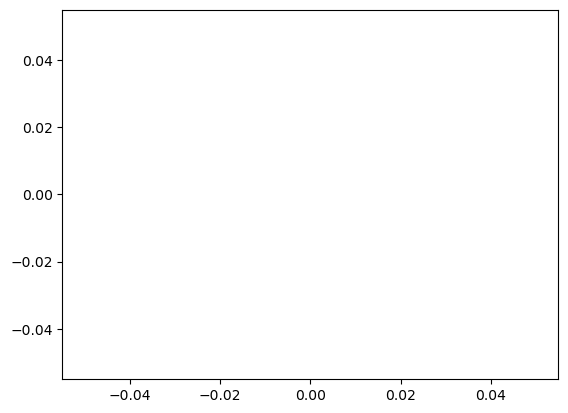

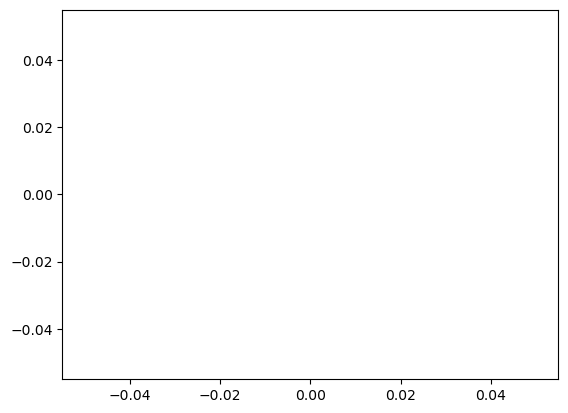

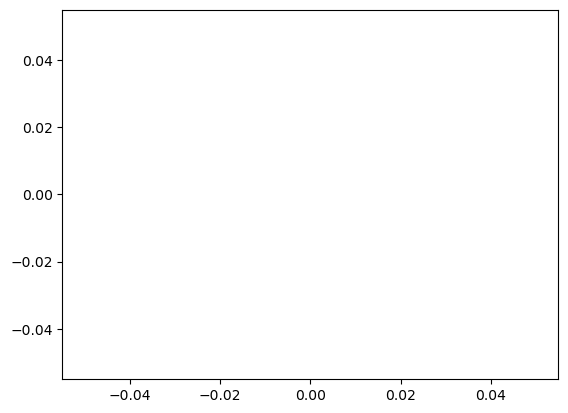

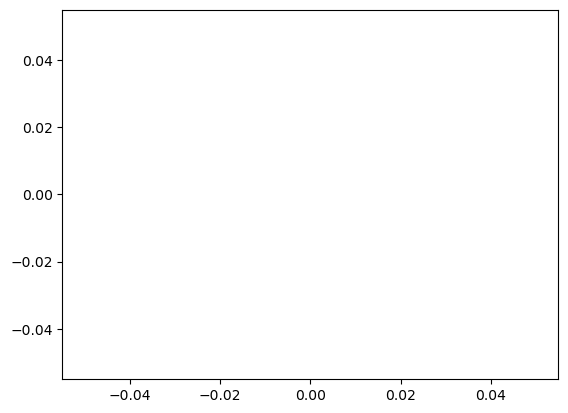

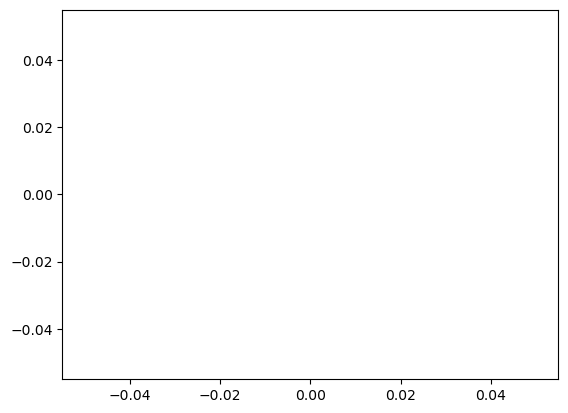

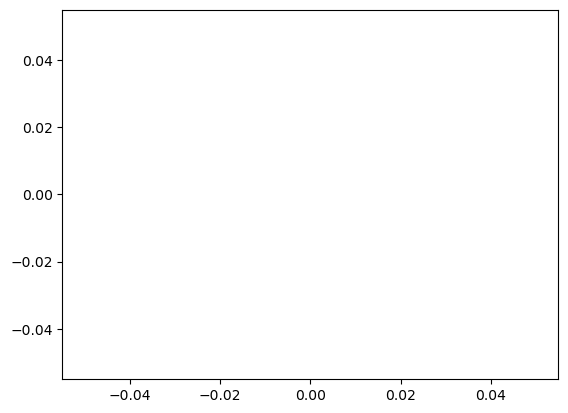

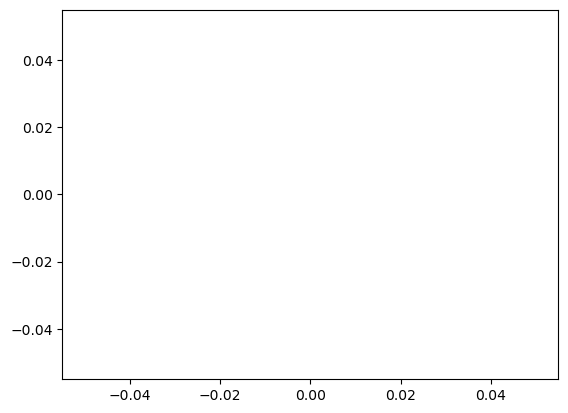

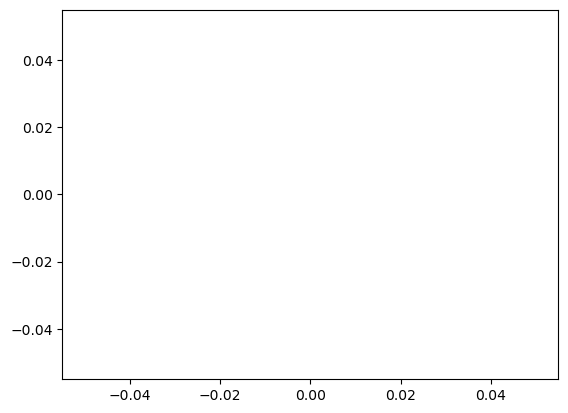

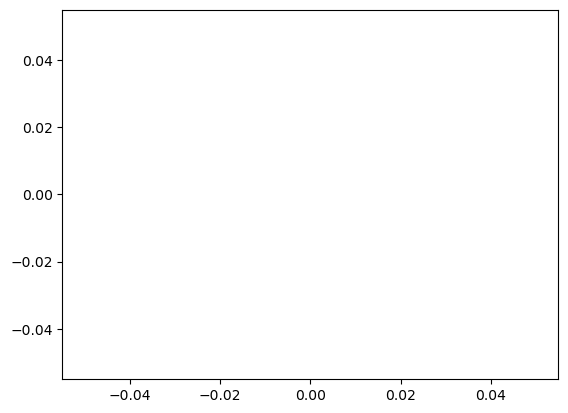

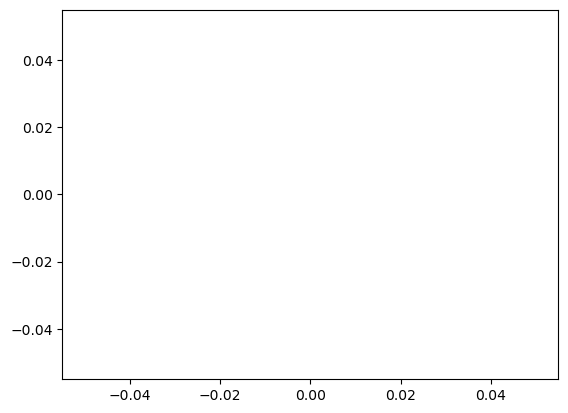

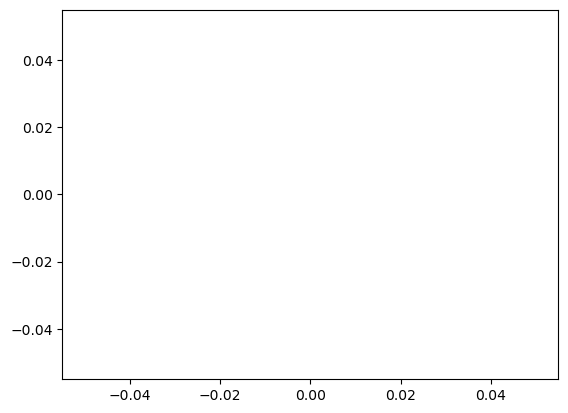

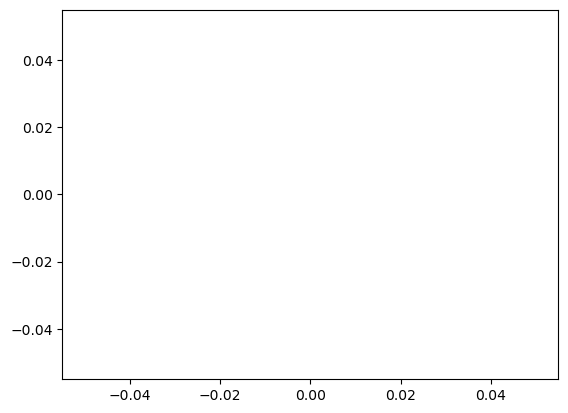

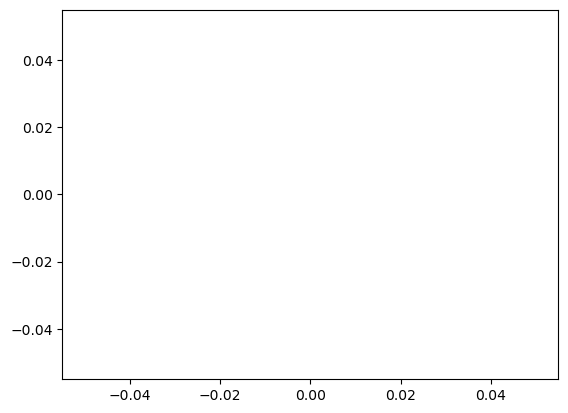

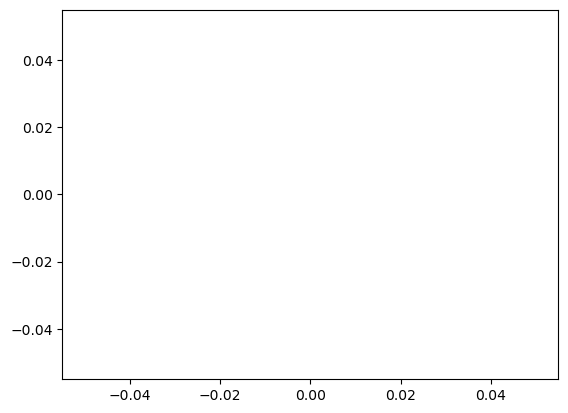

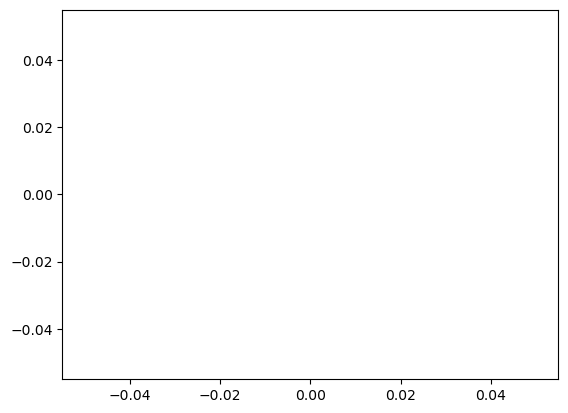

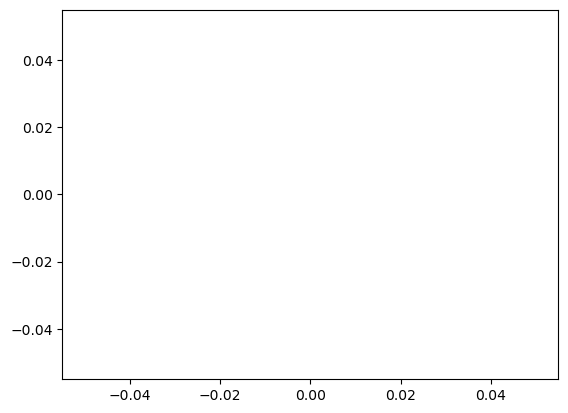

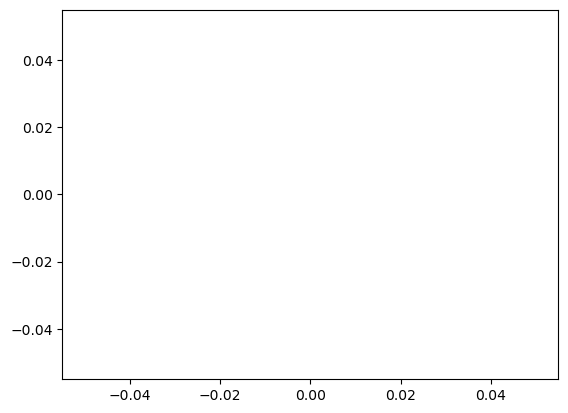

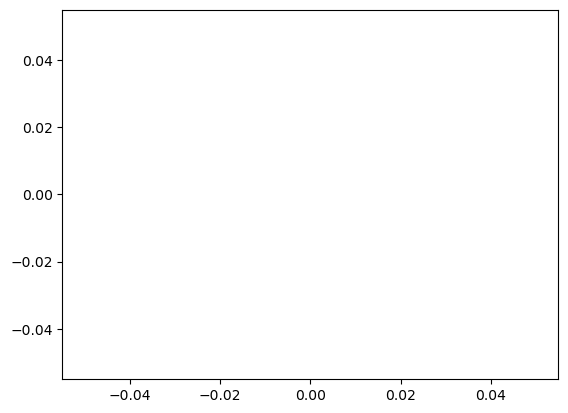

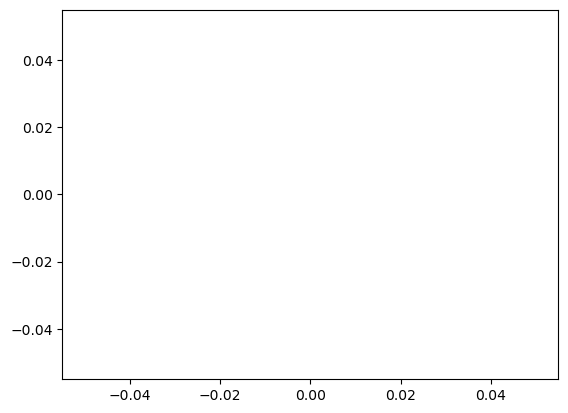

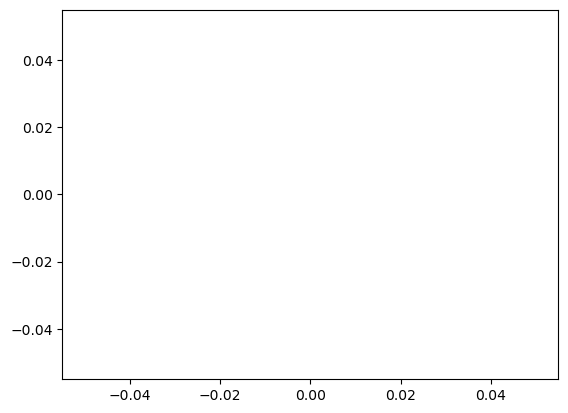

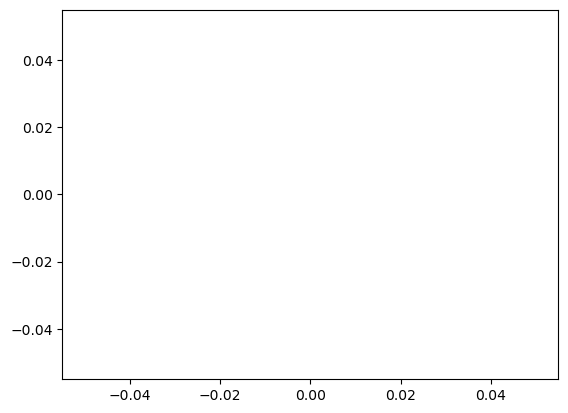

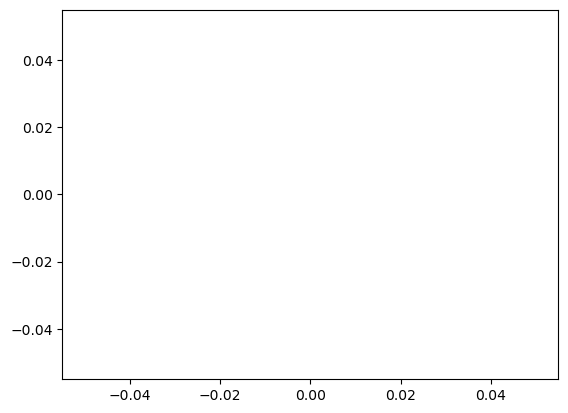

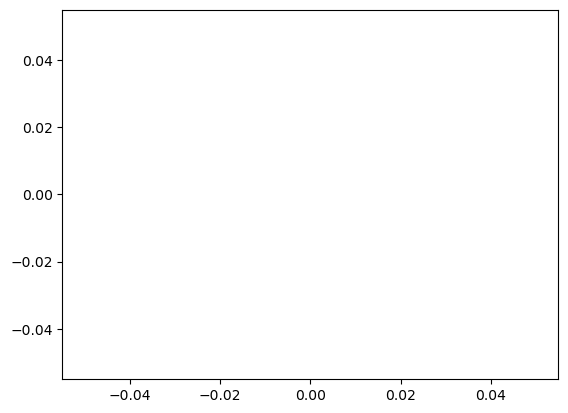

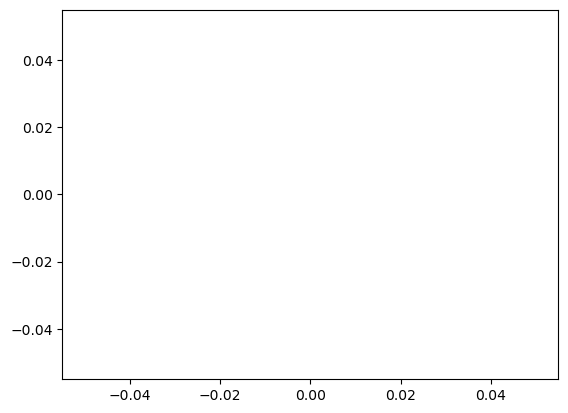

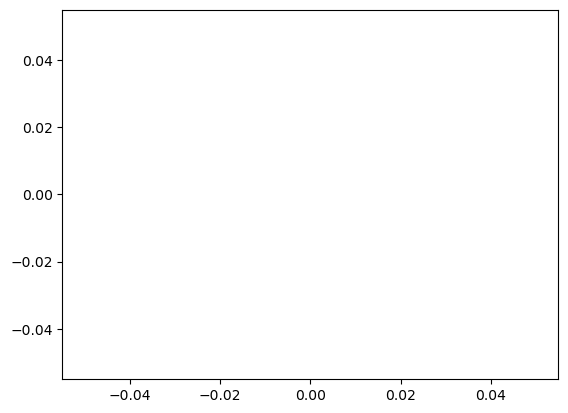

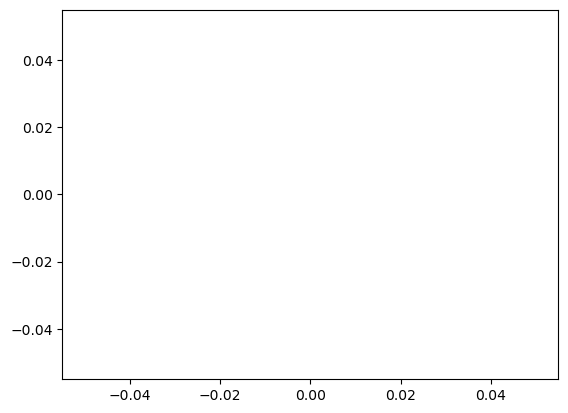

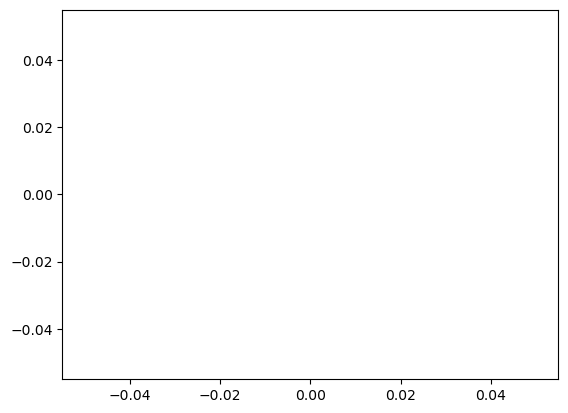

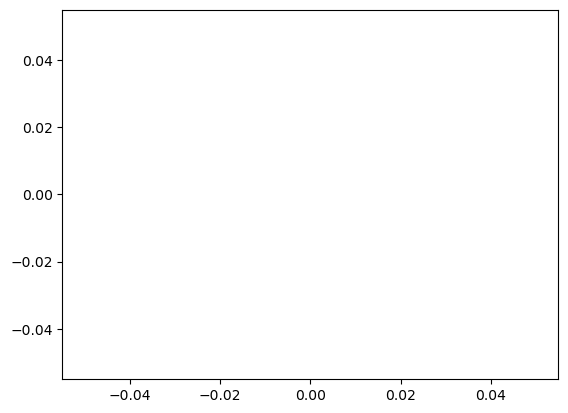

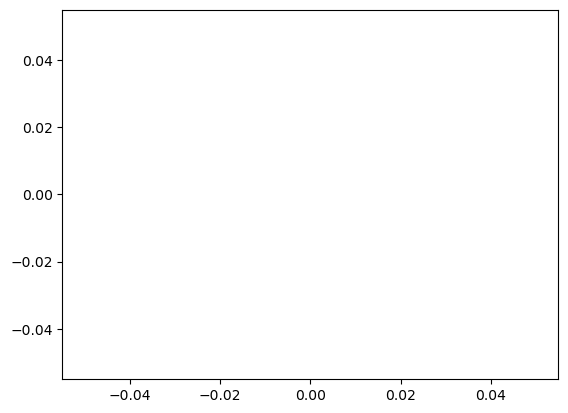

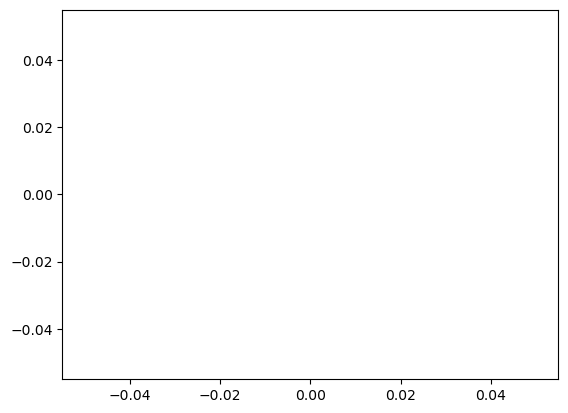

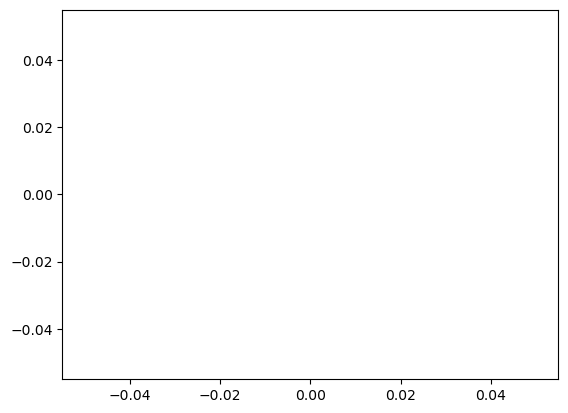

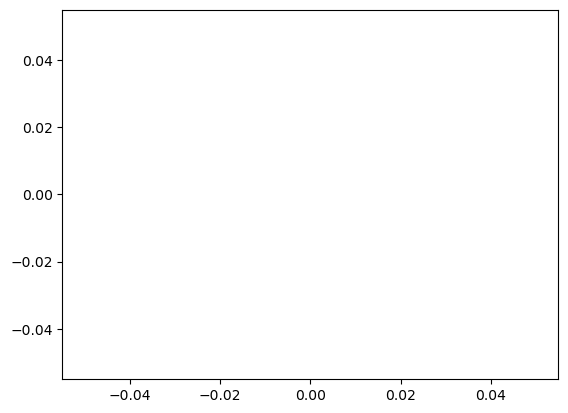

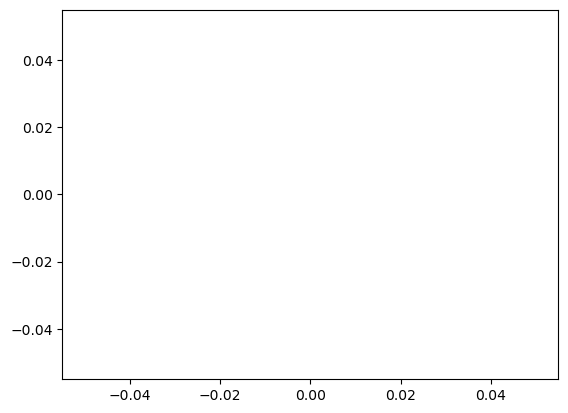

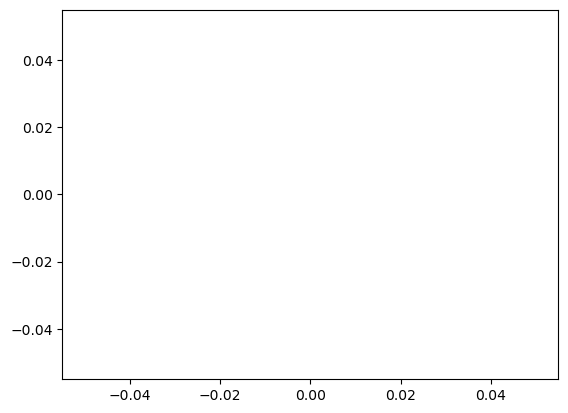

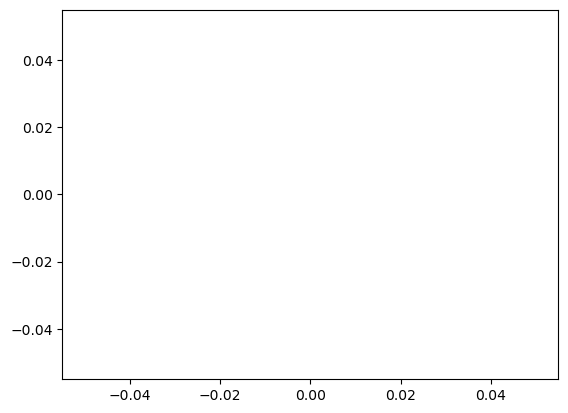

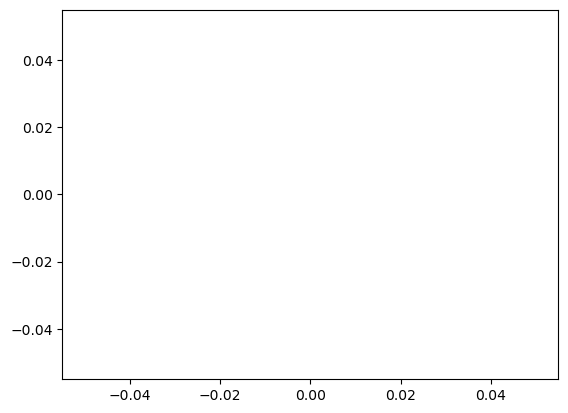

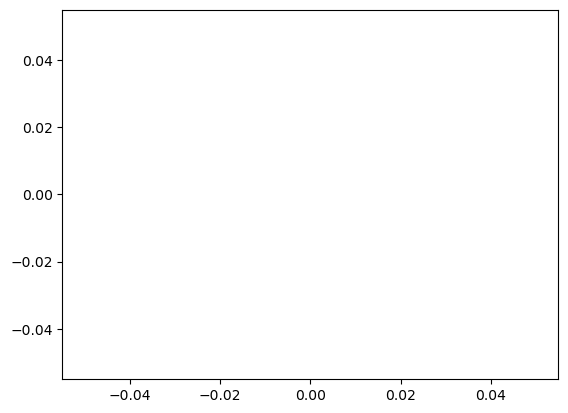

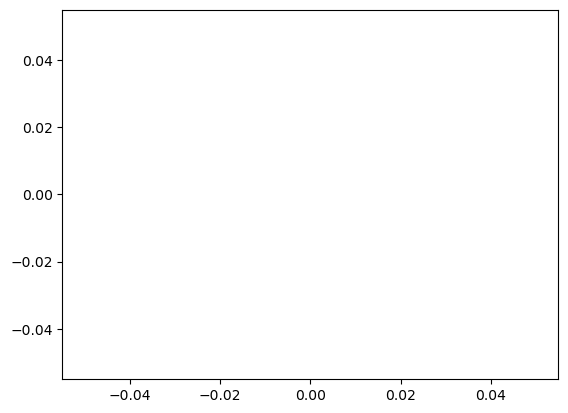

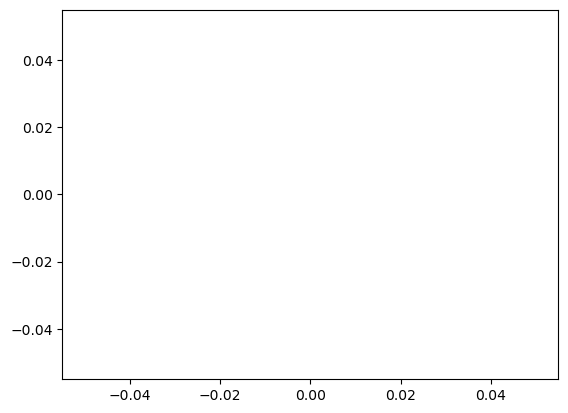

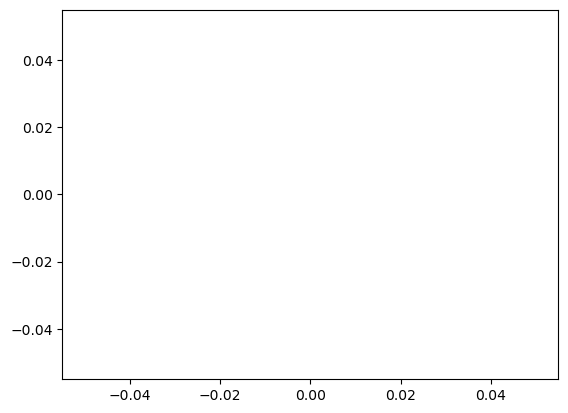

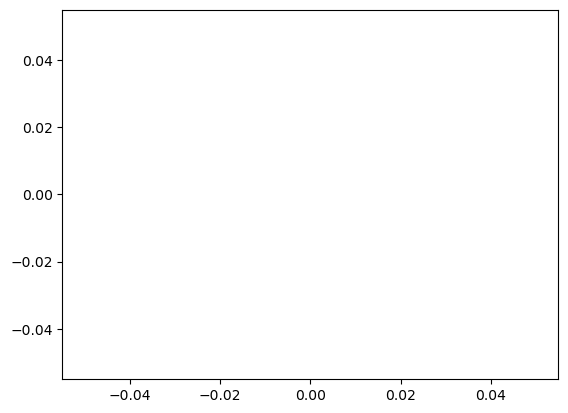

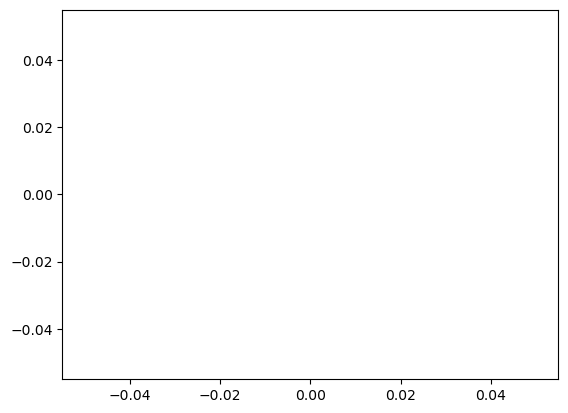

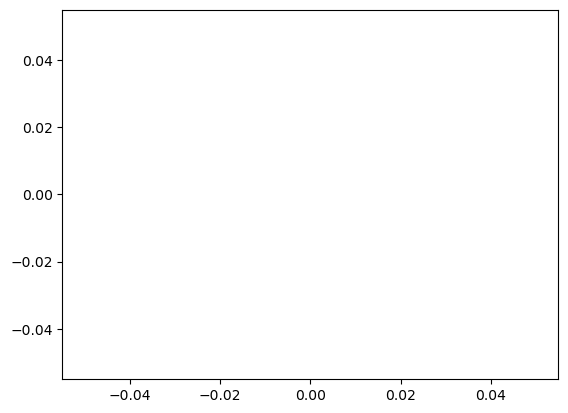

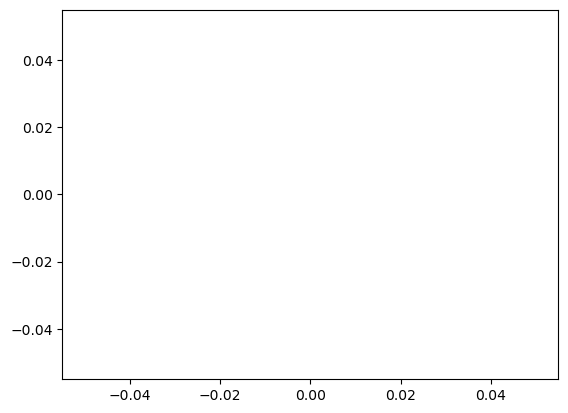

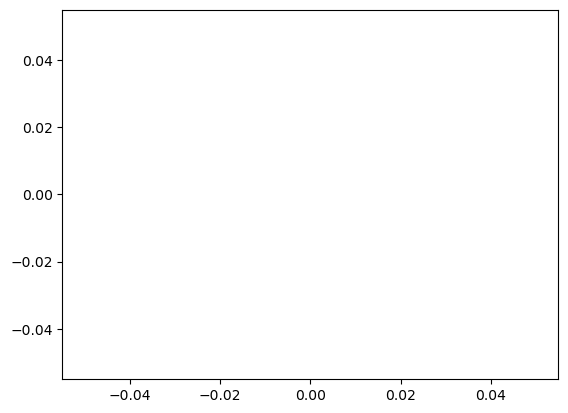

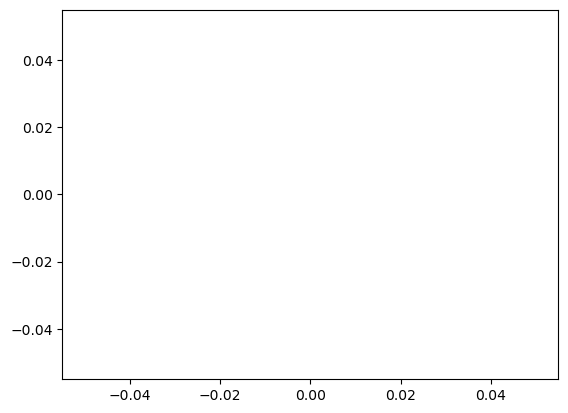

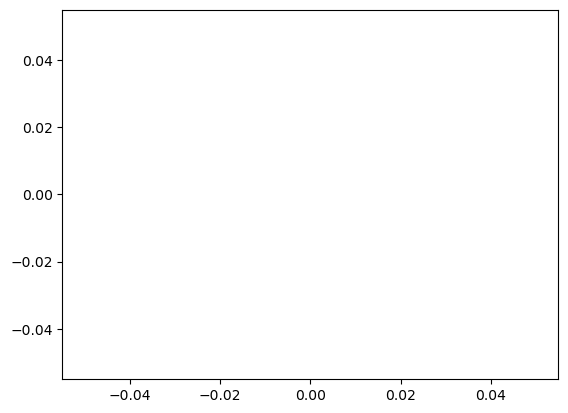

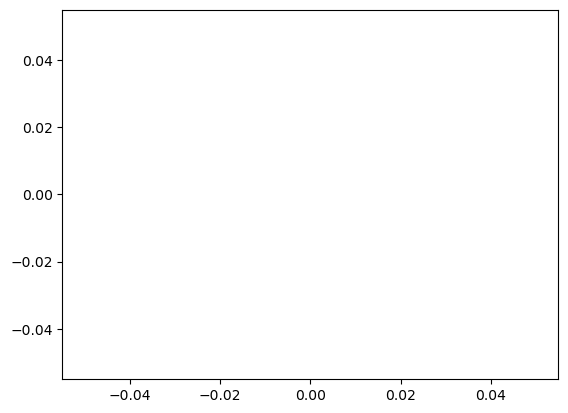

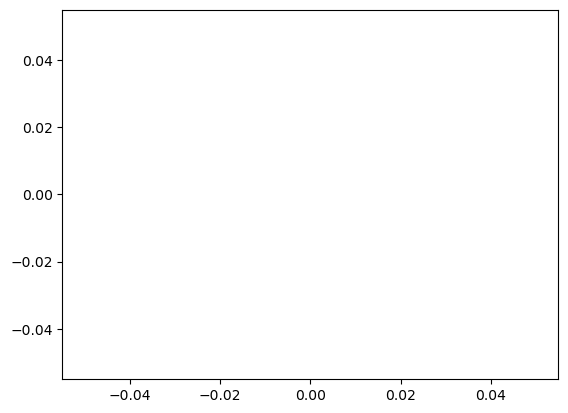

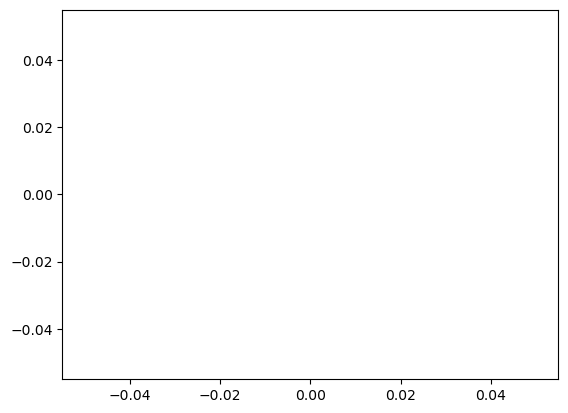

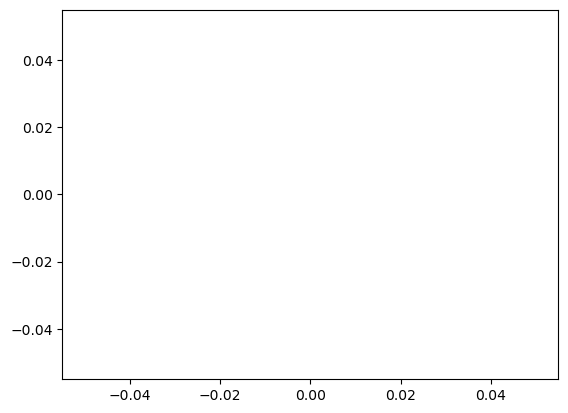

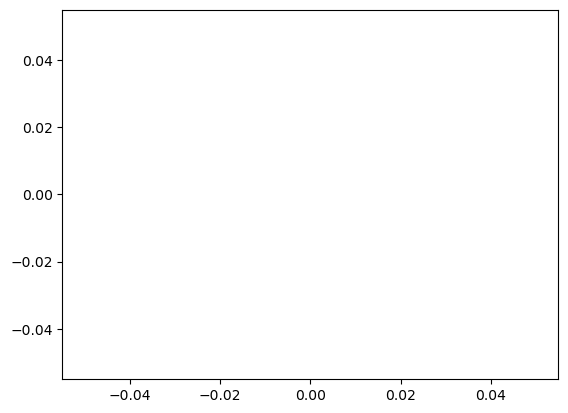

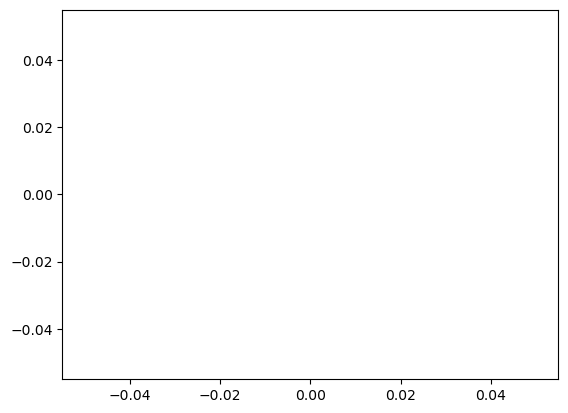

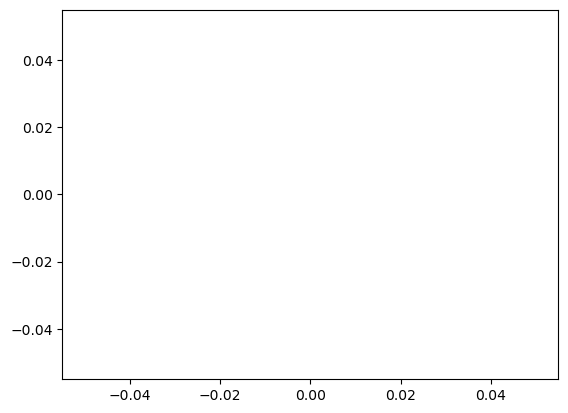

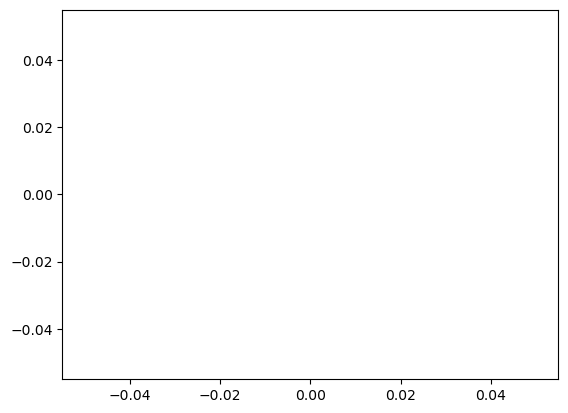

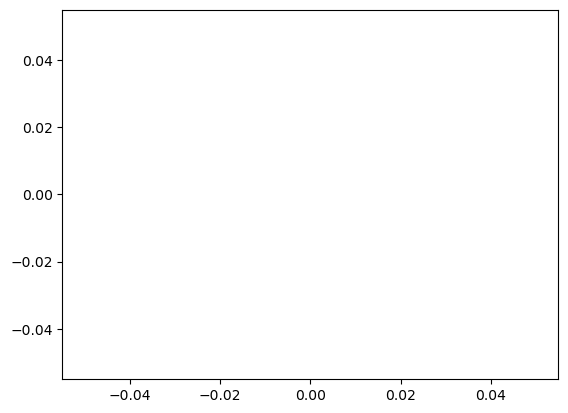

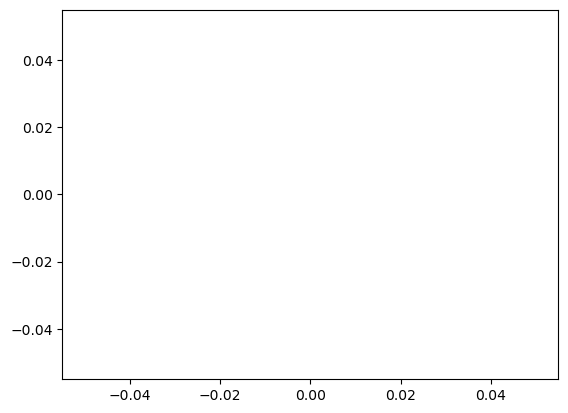

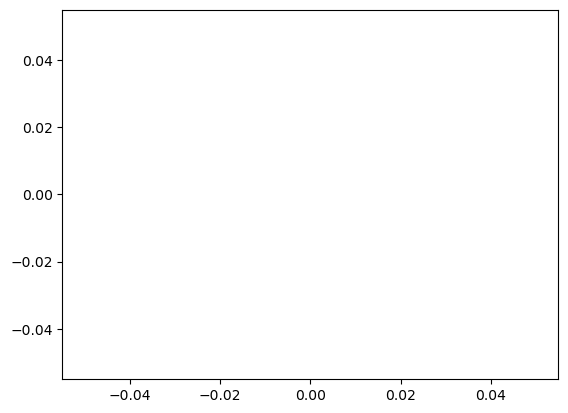

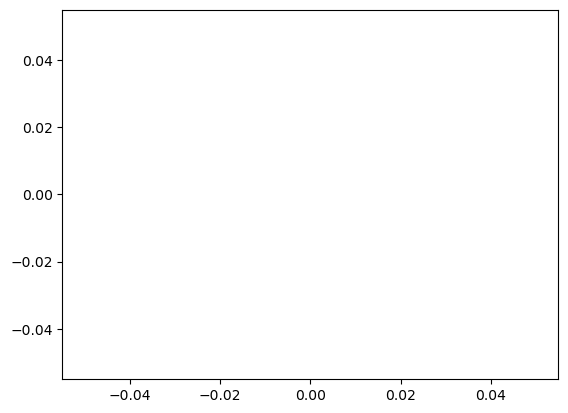

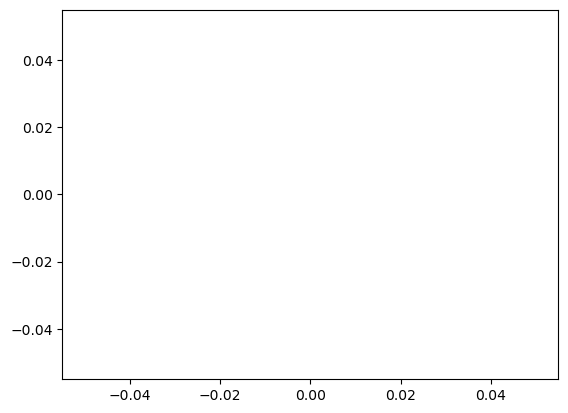

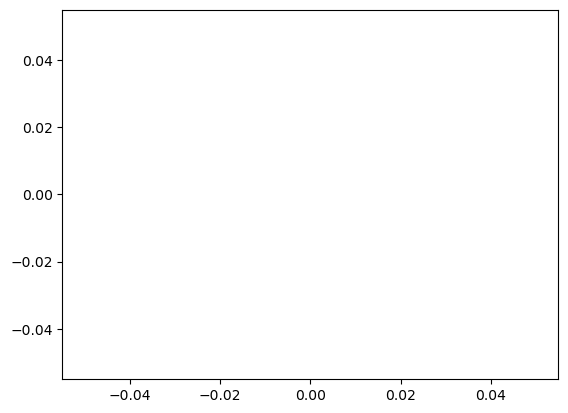

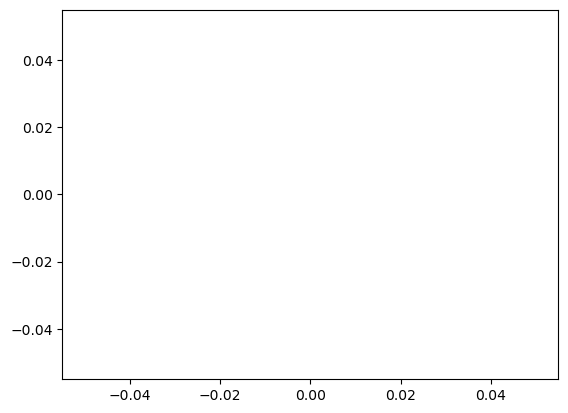

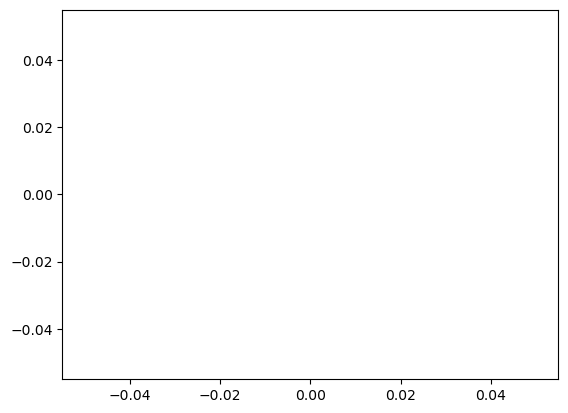

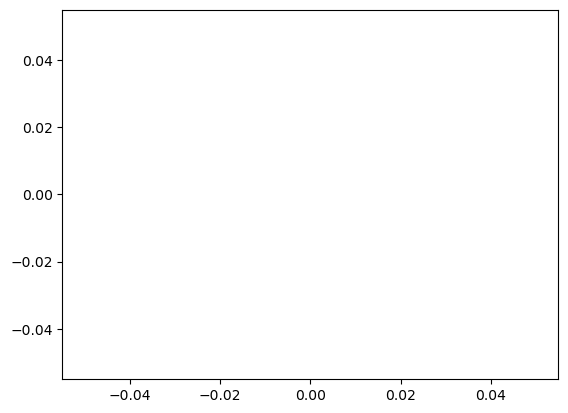

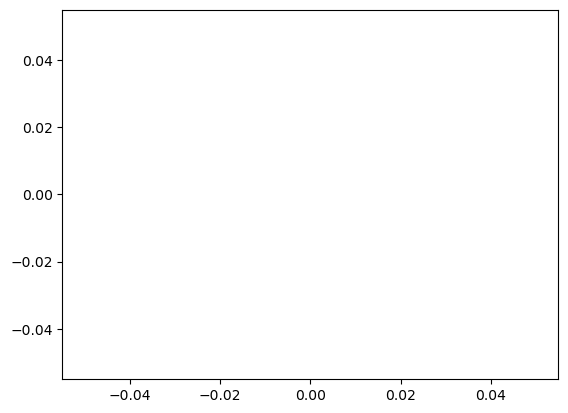

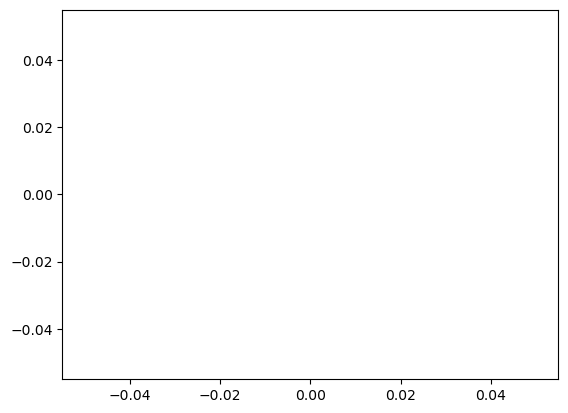

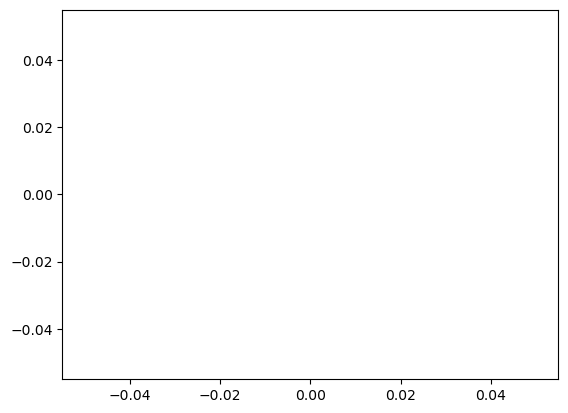

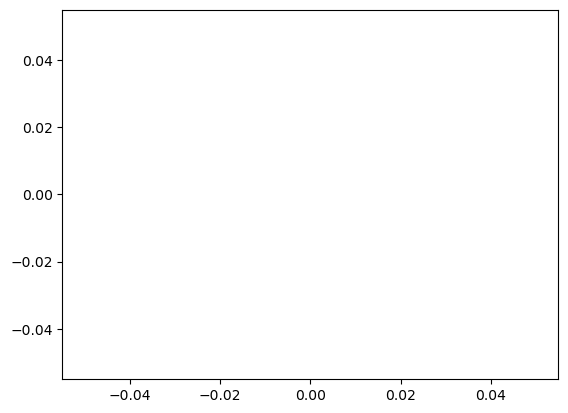

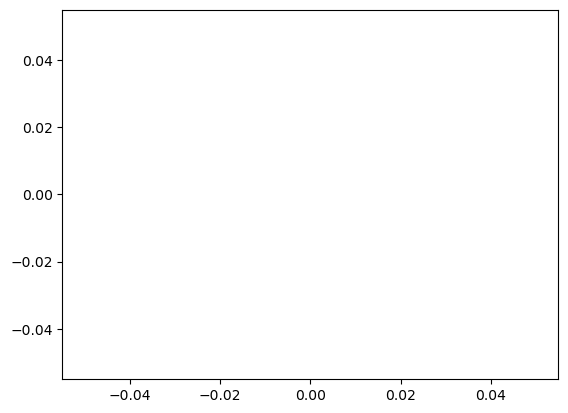

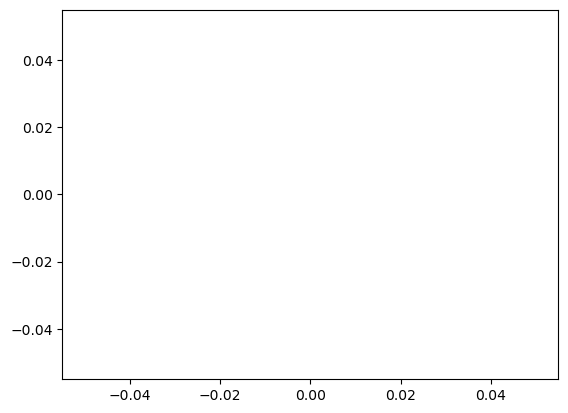

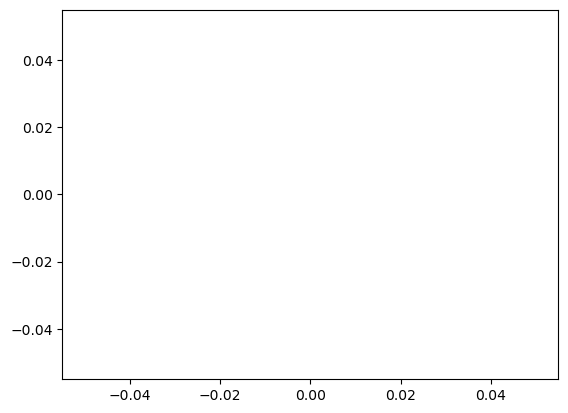

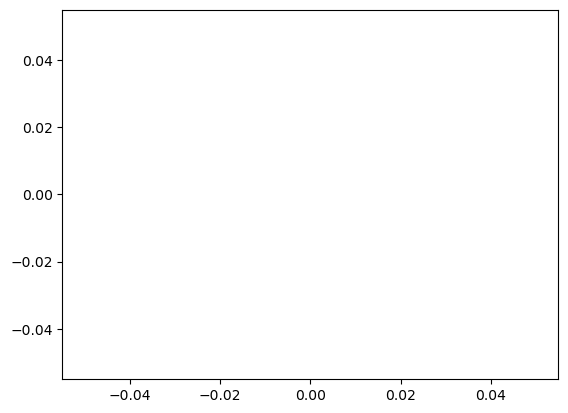

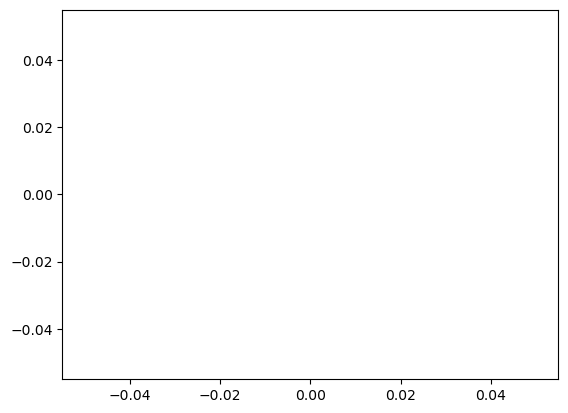

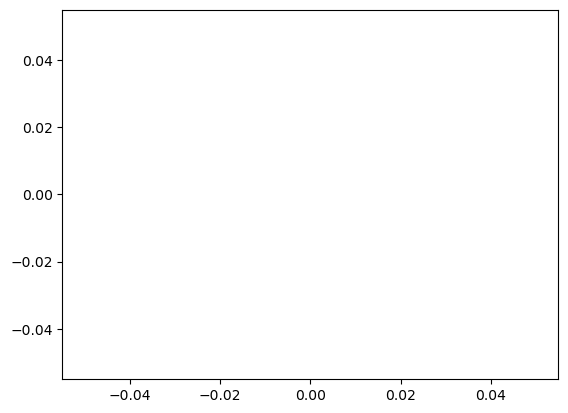

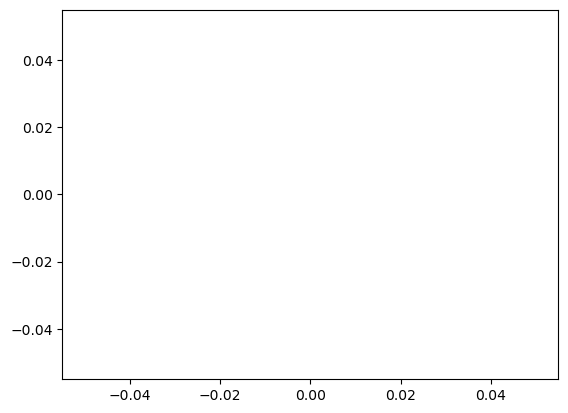

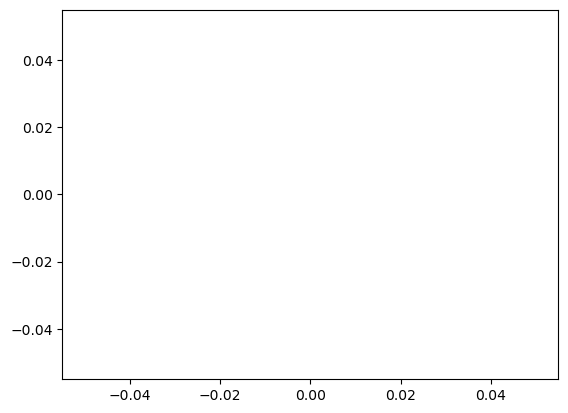

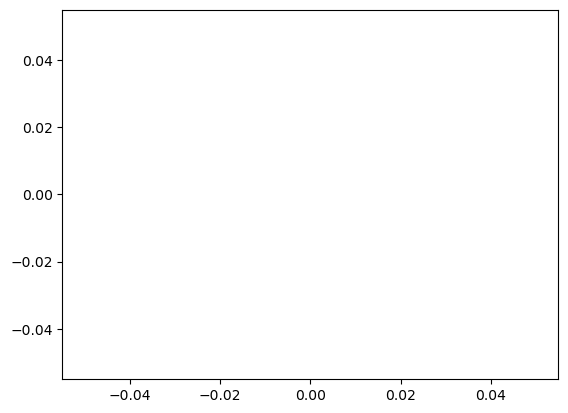

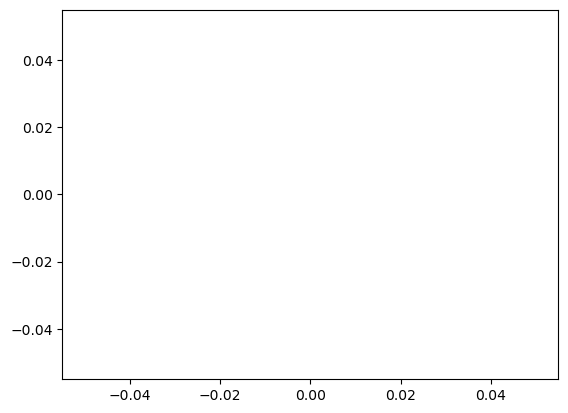

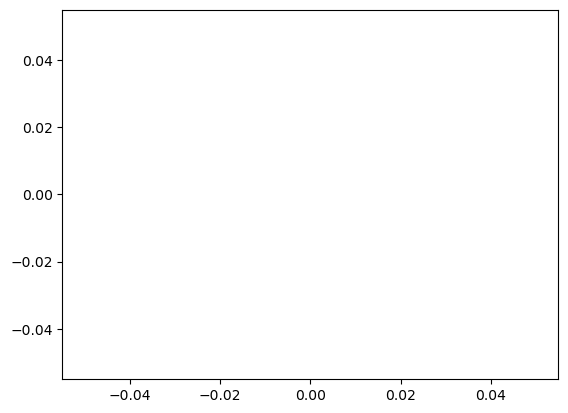

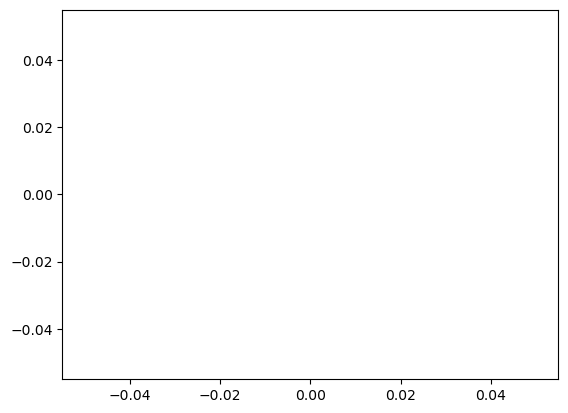

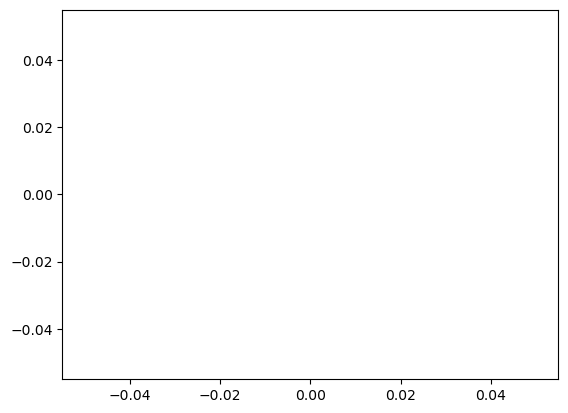

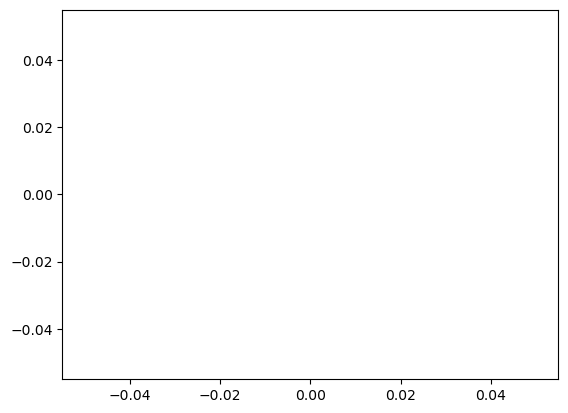

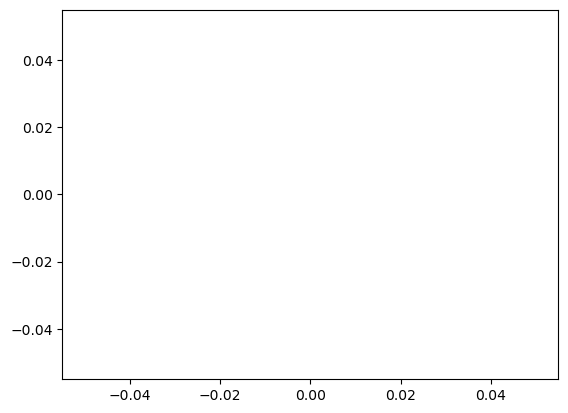

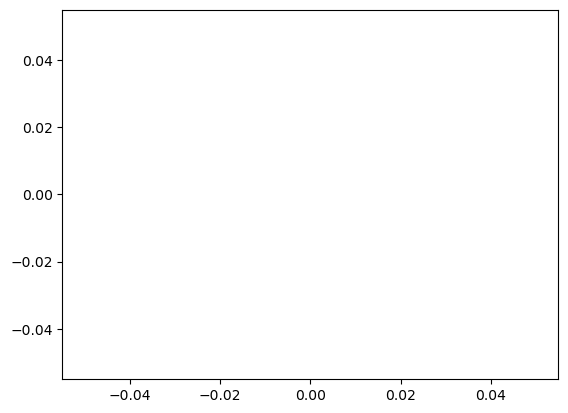

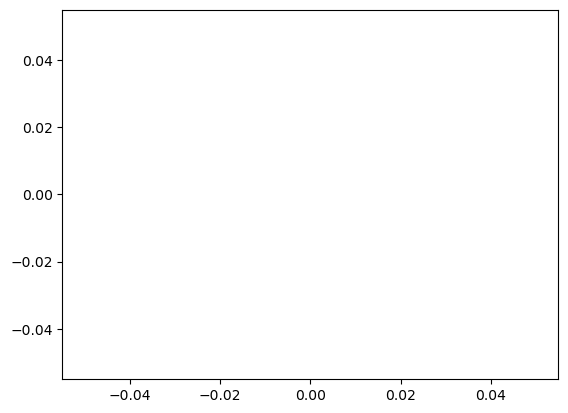

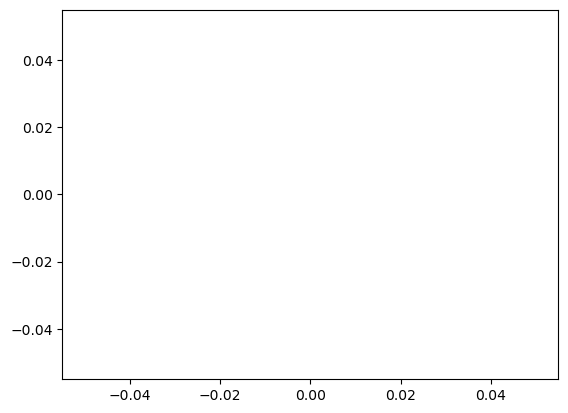

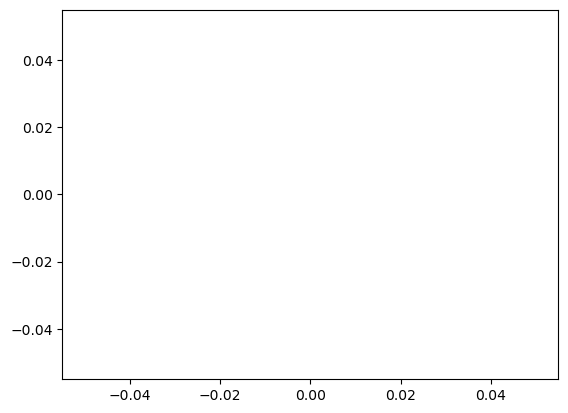

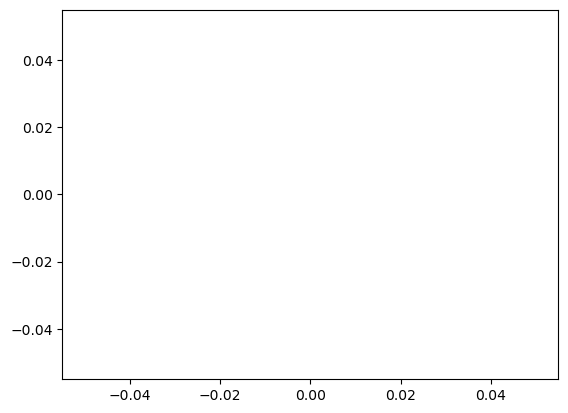

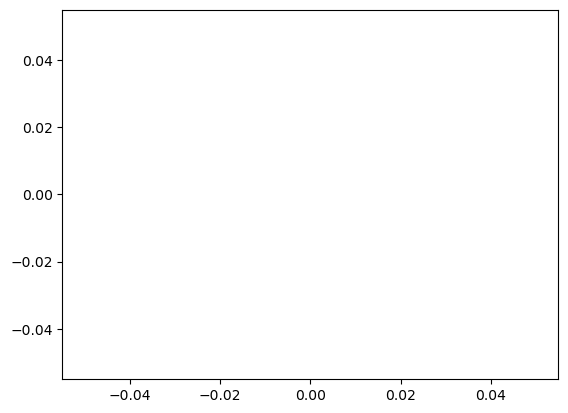

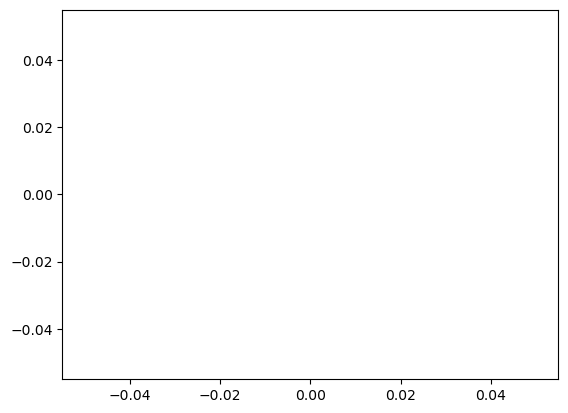

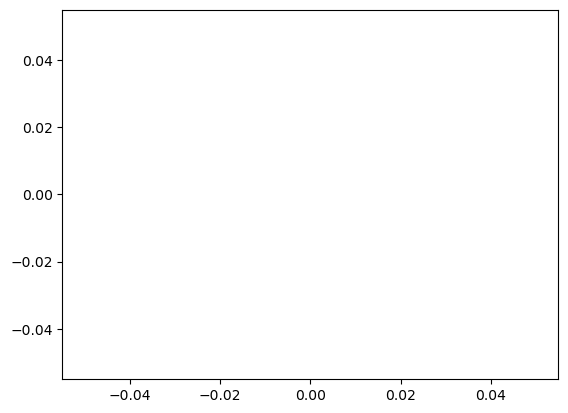

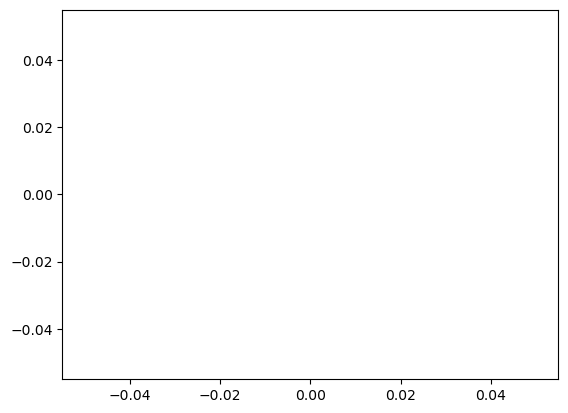

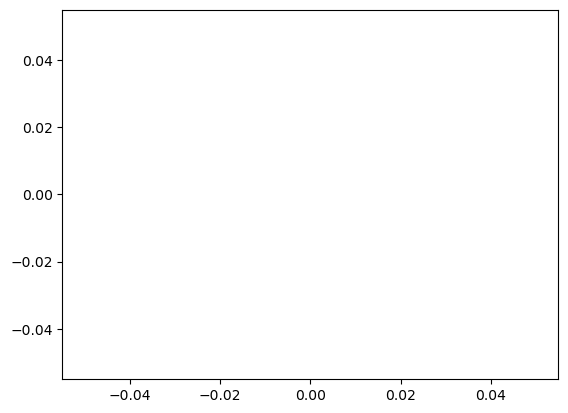

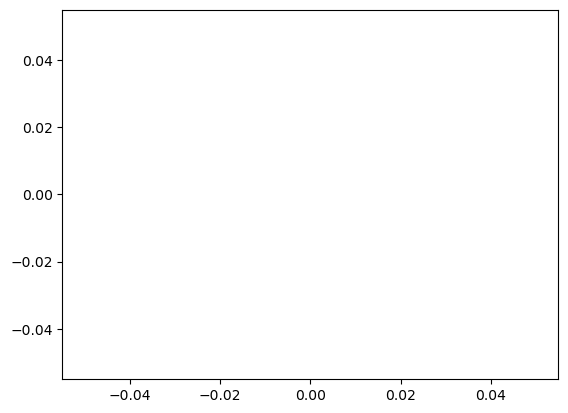

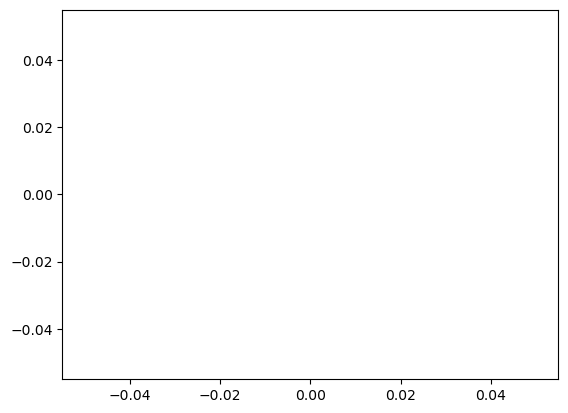

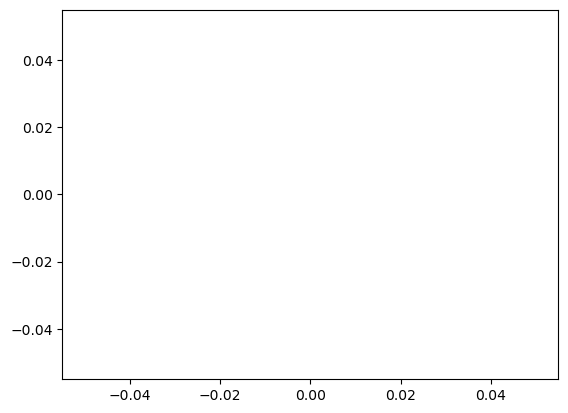

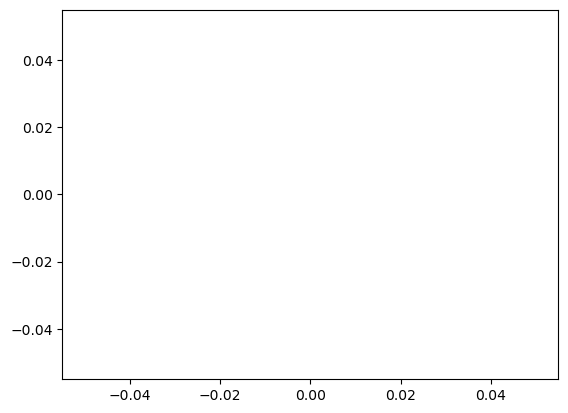

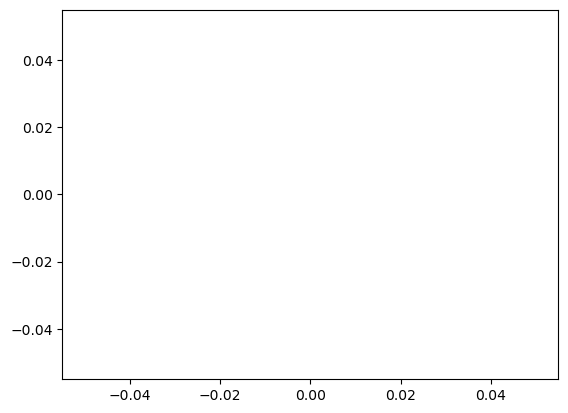

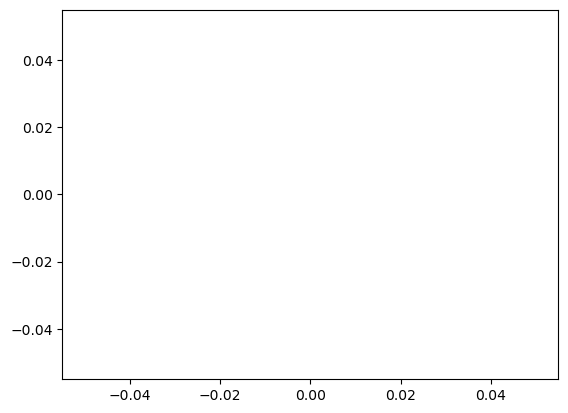

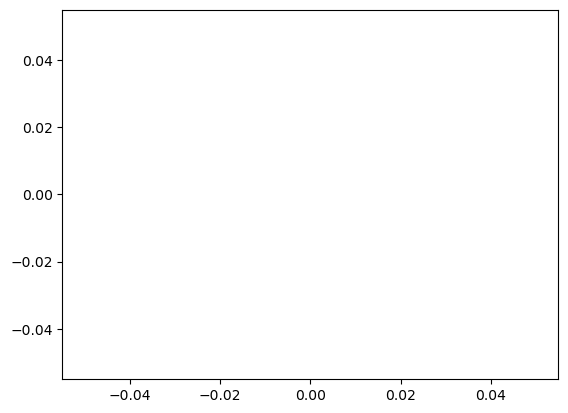

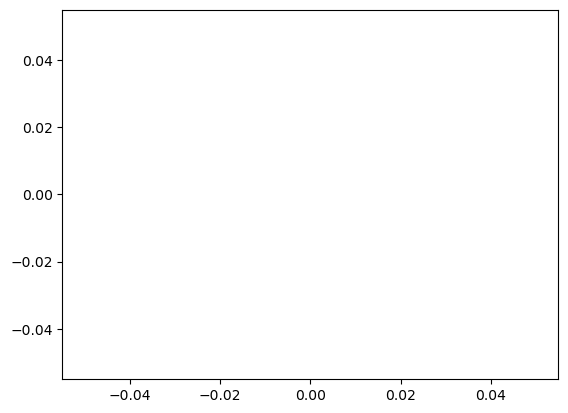

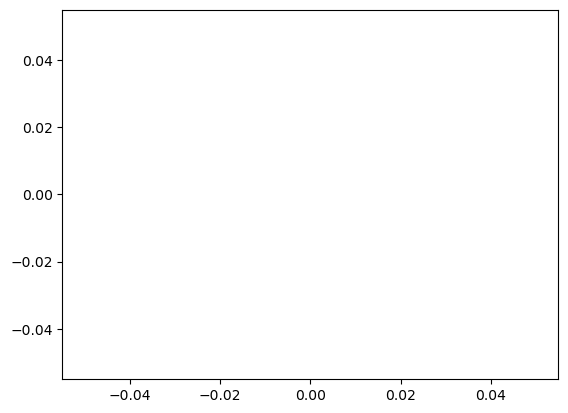

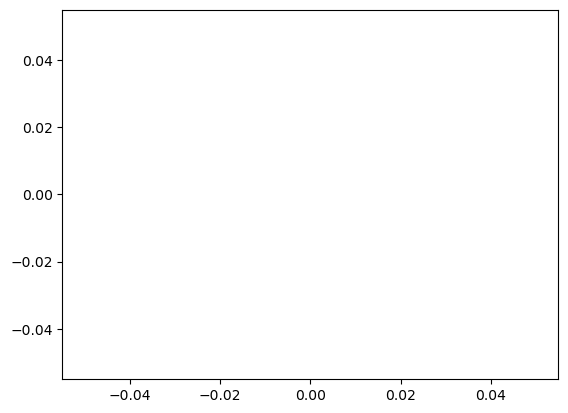

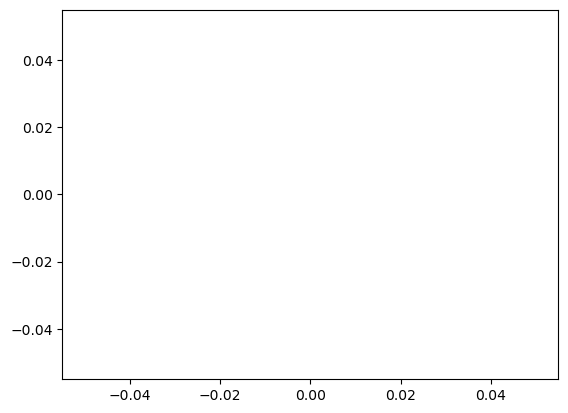

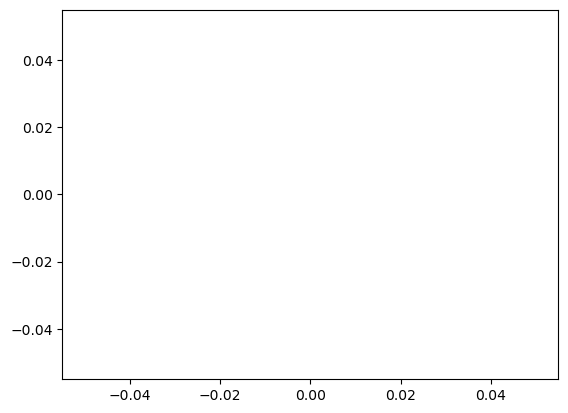

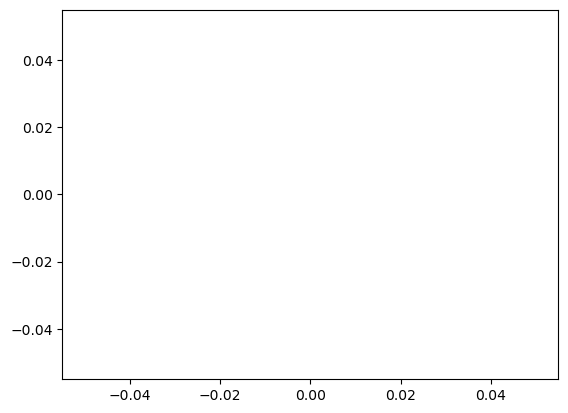

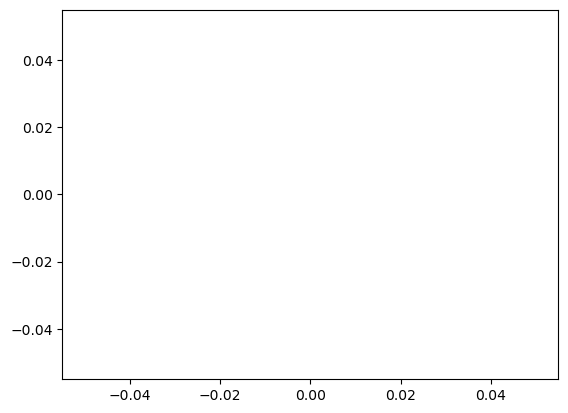

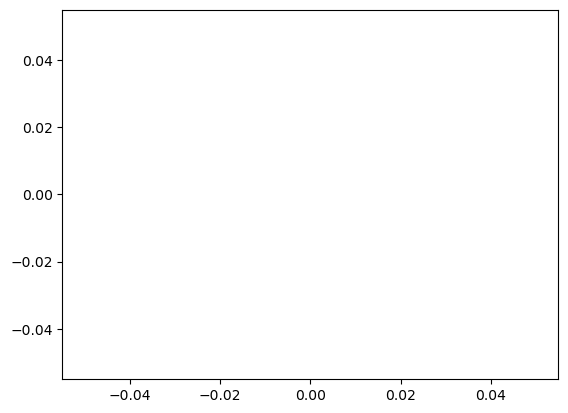

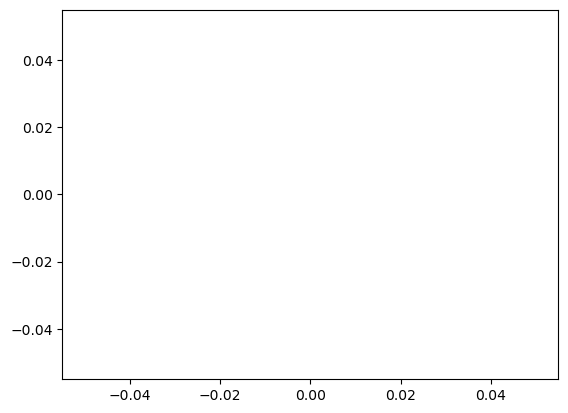

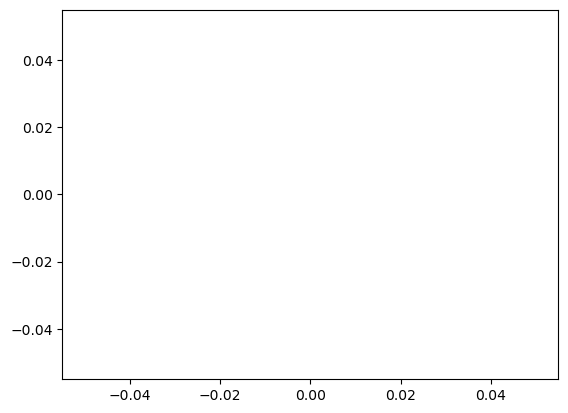

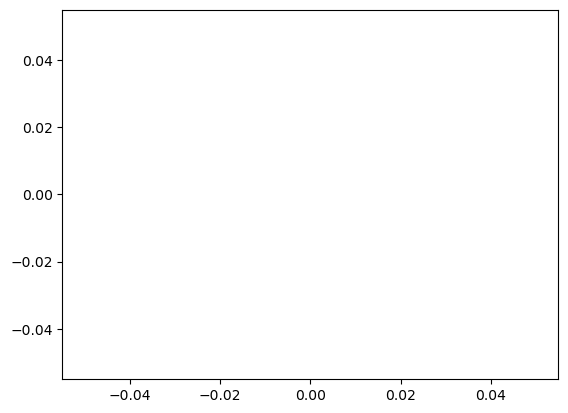

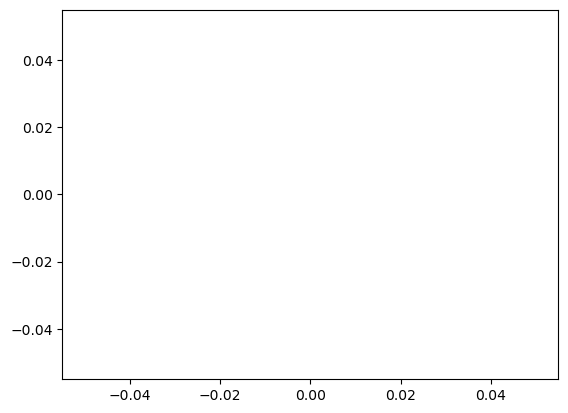

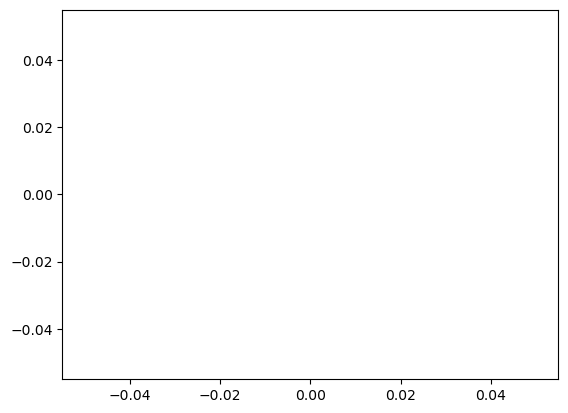

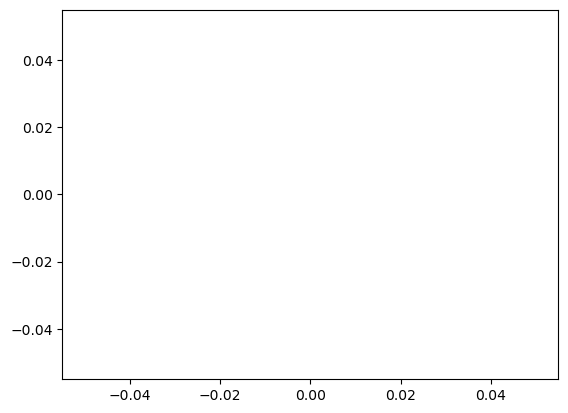

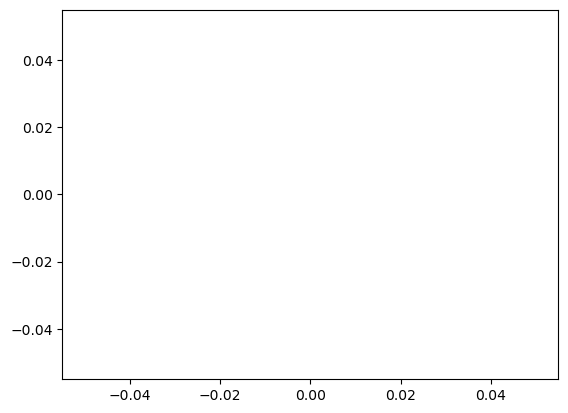

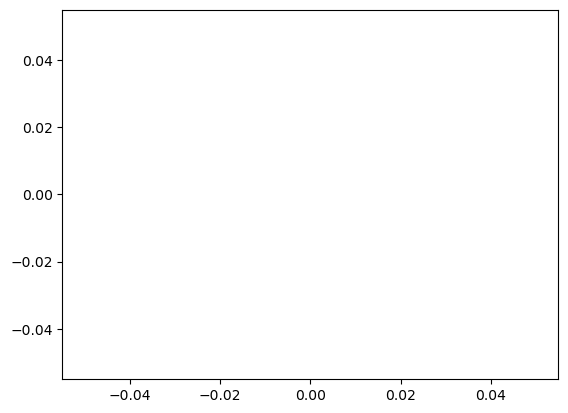

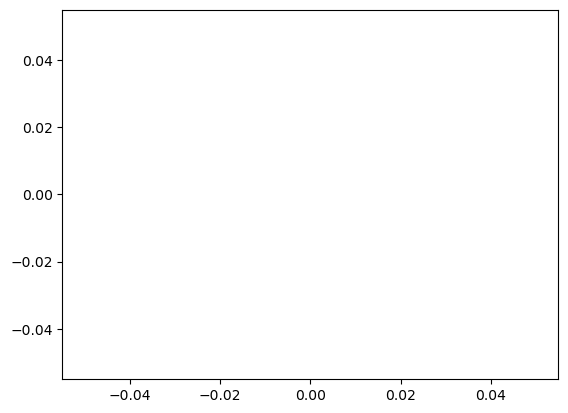

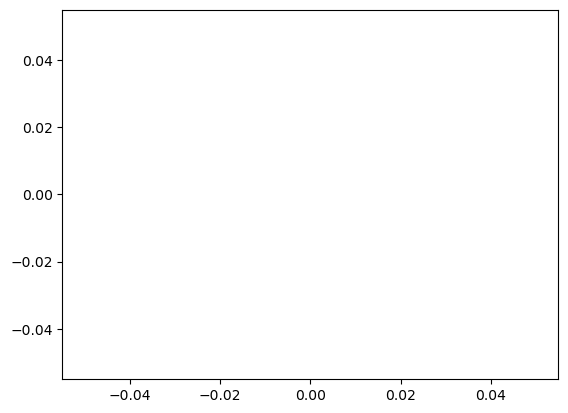

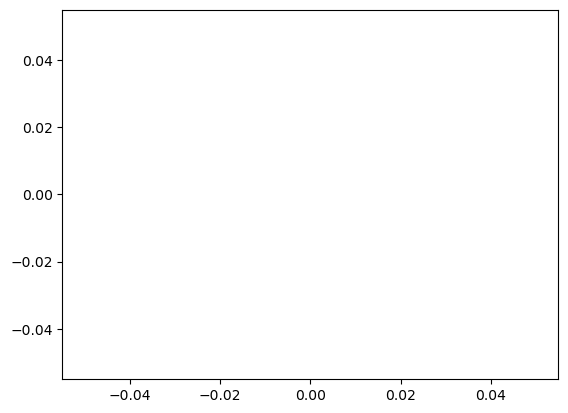

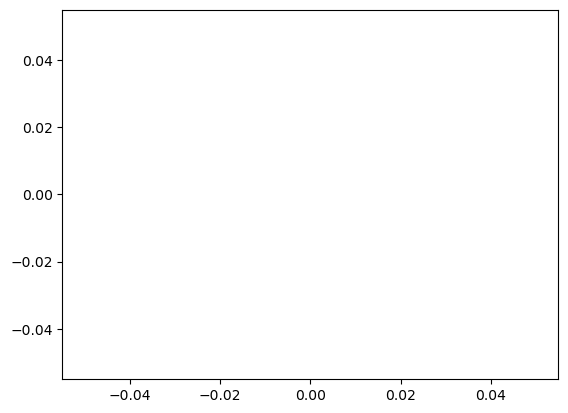

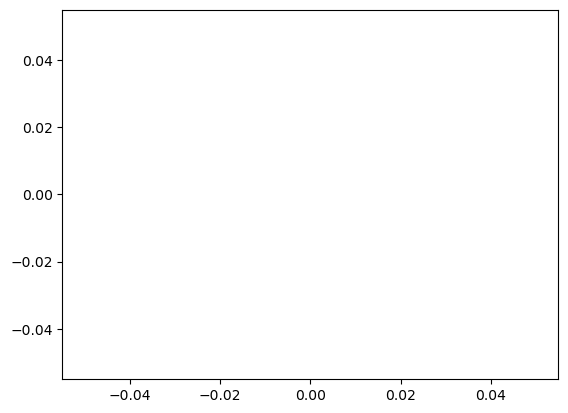

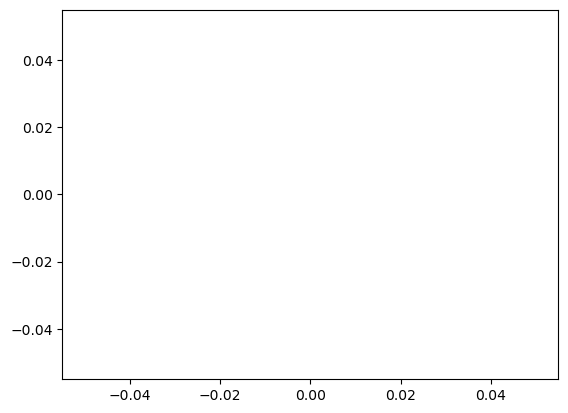

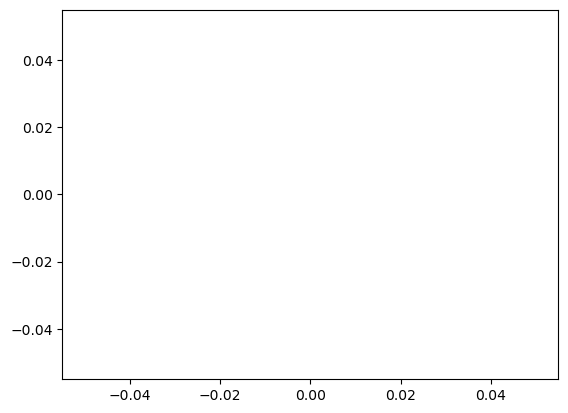

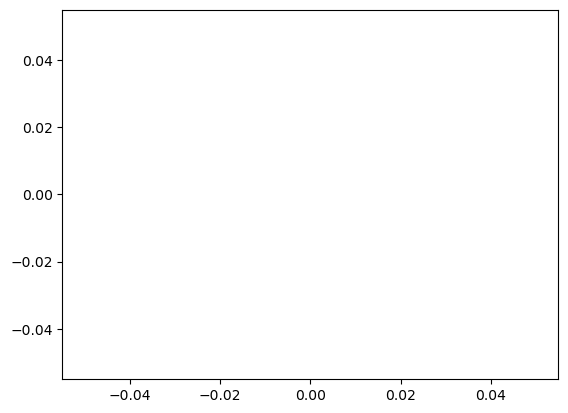

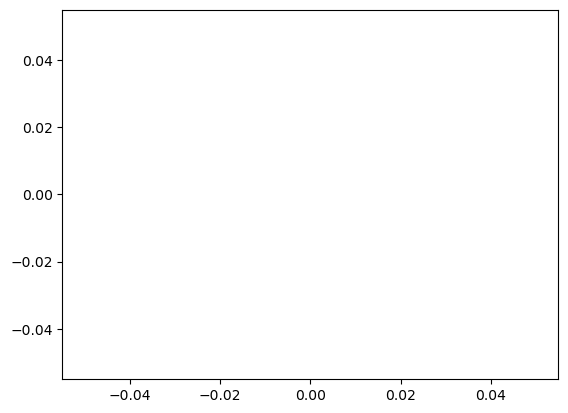

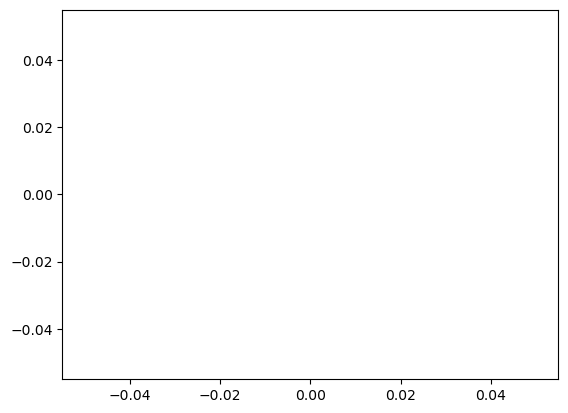

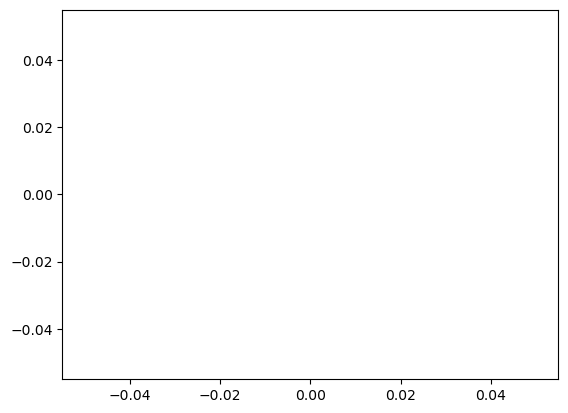

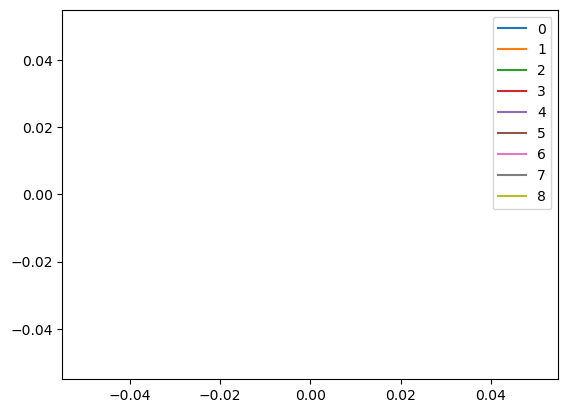

In [354]:
# Example of Optimization

s = []
for i in range(10):
    temp = df[df["store_nbr"] == i]
    s.append(temp["transactions"].values.tolist()[0:1000])
    
s = s[1:]
temp = s
print(s)
# print(len(s[0]))

plt.figure(figsize=(12,6))

for i in range(len(s)):
    plt.plot(s[i], label=i)

sum_curve = [sum(z) for z in zip(*s)]
plt.plot(sum_curve, label="sum")

sum_mean = statistics.mean(sum_curve)
print(sum_mean)
plt.axhline(statistics.mean(sum_curve), label="sum avg")
    
x = np.linspace(1, 1000, num=1000)
# print(x)
# print(temp)

plt.figure()
# s_fit = temp
# for i in range(len(d)):
#     s_fit[i] = np.polyfit(x, temp[i], deg=20)
#     plt.plot(np.polyval(s_fit[i], x), label=i)
    
costs = [10, 50, 100, 30, 20, 50, 90, 5, 75]
initial = [1, 1, 1, 1, 1, 1, 1, 1, 1]

def optimizeInventory(a, data, costs):
    plt.figure()
    cost = 0
    for i in range(len(data)):
        data[i] = [z * a[i] for z in data[i]]
        cost += sum(data[i])*costs[i]
        plt.plot(data[i], label=i)
    print(cost)
    return cost

optimizeInventory([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], s, costs)

def conMean(a, data, costs):
    for i in range(len(data)):
        data[i] = [z * a[i] for z in data[i]]
        
    new_curve = [sum(z) for z in zip(*data)]
    new_mean = statistics.mean(new_curve)
    
    return new_mean - sum_mean

cons = {'type':'eq', 'fun': conMean, 'args': (s, costs,)}
result = minimize(optimizeInventory, initial, args=(s, costs,), constraints=cons, options={"maxiter": 10, "disp": True})
print(result.x)
    
plt.legend()
plt.show()